In [1]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",None)

### Read application.csv

In [3]:
app_data=pd.read_csv("application_data.csv")
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

## Data inspection on application dataset
### Get info and shape on the dataset

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_data.shape

(307511, 122)

## Data quality check

### Check for percentage null values in application dataset

In [6]:
pd.set_option("display.max_rows",200)
app_data.isnull().mean() * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Conclusion: Columns with null values more than 47% may give wrong insights, hence we will drop them.


### Dropping columns with missing values greater than 47%

In [7]:
percentage = 47
threshold =int(((100-percentage)/100)*app_data.shape[0] * 1)
app_df = app_data.dropna(axis = 1, thresh = threshold)
app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [8]:
app_df.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Impute missing values

#### check the missing values in the application dataset before imputing

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### OCCUPATION_TYPE col has 31% missing values, since it is a categorical column , imputing the missing values with a unknown or other value

In [10]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(31.345545362604916)

In [11]:
# normalizing the value
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [12]:
#imputing the values
app_df.OCCUPATION_TYPE.fillna("Others",inplace=True)

In [13]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(0.0)

In [14]:
# normalizing the value
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

### EXT_SOURCE_3 Column has 19% missing values

In [15]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(19.825307062186393)

In [16]:
# normalizing the value
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.028275    0.000406
0.858178    0.000406
0.849170    0.000406
0.887664    0.000406
0.864212    0.000406
Name: proportion, Length: 814, dtype: float64

In [17]:
#descriptive statistics
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

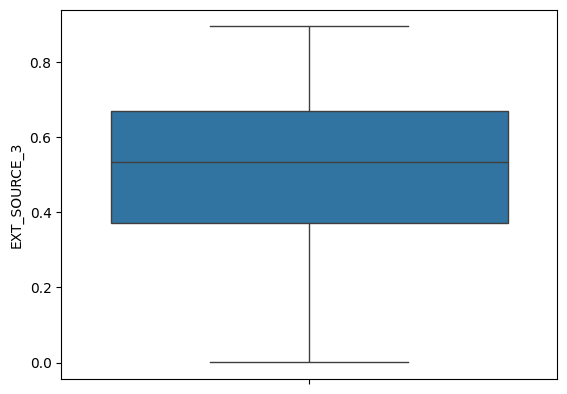

In [18]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

#### Conclusion: Since it is a numerical column with no outliers and there is not much difference between mean and median. 
#### Hence we can impute with mean or median

In [19]:
#imputing median value
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [20]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(0.0)

In [21]:
# normalizing the value
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.028275     0.000325
0.858178     0.000325
0.849170     0.000325
0.887664     0.000325
0.864212     0.000325
Name: proportion, Length: 814, dtype: float64

In [22]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

16

In [23]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### Handling misssing values in columns with 13% null values

In [24]:
# normalizing the value
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [25]:
# normalizing the value
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [26]:
# normalizing the value
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [27]:
# normalizing the value
app_df.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [28]:
# normalizing the value
app_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [29]:
# normalizing the value
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
18.0     0.001504
19.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

##### Conclusion: We could see that 99% values in the columns AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,
##### AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR is 0.0. hence impute this columns with the mode

In [30]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)

In [31]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


#### Handling missing values less than 1%

In [32]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [33]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [34]:
app_df.EXT_SOURCE_2 .value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.353855    0.000326
0.200589    0.000326
0.146779    0.000326
0.288490    0.000326
0.269471    0.000326
Name: proportion, Length: 119831, dtype: float64

In [35]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
29.0      0.000326
28.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

In [36]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

DEF_30_CNT_SOCIAL_CIRCLE
0.0     88.526216
1.0      9.242716
2.0      1.736761
3.0      0.388920
4.0      0.082548
5.0      0.018271
6.0      0.003589
7.0      0.000326
34.0     0.000326
8.0      0.000326
Name: proportion, dtype: float64

In [37]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_60_CNT_SOCIAL_CIRCLE
0.0      53.726386
1.0      15.945055
2.0       9.711899
3.0       6.595647
4.0       4.550230
5.0       3.087540
6.0       2.071519
7.0       1.417338
8.0       0.941629
9.0       0.639173
10.0      0.435577
11.0      0.273092
12.0      0.202290
13.0      0.130836
14.0      0.077653
15.0      0.054162
16.0      0.044700
17.0      0.023818
18.0      0.015987
19.0      0.014356
20.0      0.009788
21.0      0.009136
22.0      0.006525
23.0      0.004242
24.0      0.003915
25.0      0.003589
27.0      0.001631
29.0      0.000653
28.0      0.000326
47.0      0.000326
344.0     0.000326
30.0      0.000326
26.0      0.000326
Name: proportion, dtype: float64

In [38]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

DEF_60_CNT_SOCIAL_CIRCLE
0.0     91.592222
1.0      7.126171
2.0      1.034291
3.0      0.195112
4.0      0.044047
5.0      0.006525
6.0      0.000979
7.0      0.000326
24.0     0.000326
Name: proportion, dtype: float64

#### - Conclusion:
####           - For categorical cols, impute missing values with mode
####           - For numerical cols, impute missing values with median

In [39]:
# categorical col-
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [40]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [41]:
# numeric col:
app_df.EXT_SOURCE_2 .fillna(app_df.EXT_SOURCE_2 .median(),inplace=True)

In [42]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [43]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [44]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [45]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [46]:
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(),inplace=True)

In [47]:
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)

In [48]:
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [49]:
#checking for null values if any
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [50]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

#### Convert negative values to positive in days variable to that median is not affected

In [51]:
app_df.YEARS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.YEARS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.YEARS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.YEARS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.YEARS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [52]:
app_df.YEARS_EMPLOYED

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

#### Binning of continuous variables
#### Standardizing days columns into years for easy binning

In [53]:
#binning is a process where we group similar numbers or close by numbers of continuous variables into discrete var's

In [54]:
app_df["YEARS_BIRTH"] = app_df.YEARS_BIRTH.apply(lambda x: int(x//365))
app_df["YEARS_EMPLOYED"] = app_df.YEARS_EMPLOYED.apply(lambda x: int(x//365))
app_df["YEARS_REGISTRATION"] = app_df.YEARS_REGISTRATION.apply(lambda x: int(x//365))
app_df["YEARS_ID_PUBLISH"] = app_df.YEARS_ID_PUBLISH.apply(lambda x: int(x//365))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.YEARS_LAST_PHONE_CHANGE.apply(lambda x: int(x//365))

In [55]:
app_df["YEARS_EMPLOYED"]

0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: YEARS_EMPLOYED, Length: 307511, dtype: int64

#### Binning AMT_CREDIT column

In [56]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
425326.5     0.000325
1247643.0    0.000325
264600.0     0.000325
766444.5     0.000325
1317807.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [57]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [58]:
app_df['AMT_CREDIT_Category'] = pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                      labels = ['Very low credit','Low credit','Medium credit','High credit','Very high credit'])

In [59]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Low credit          31.511770
Medium credit       25.733324
High credit         16.791314
Very low credit     14.035088
Very high credit    11.928504
Name: proportion, dtype: float64

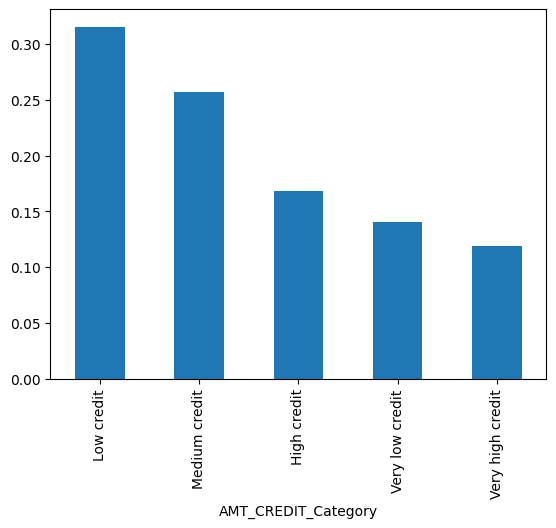

In [60]:
app_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.bar()
plt.show()

##### Conclusion: The credit amount of the loan for amount low(2L to 4L) or very high (above 8L)

### Binning YEARS_BIRTH column

In [61]:
app_df["YEARS_BIRTH"].value_counts(normalize=True)*100

YEARS_BIRTH
38    2.885425
37    2.861361
39    2.851931
40    2.804453
36    2.801201
27    2.756324
41    2.747544
31    2.724130
43    2.701692
42    2.671774
28    2.593403
32    2.572591
44    2.542673
30    2.538446
35    2.537795
33    2.508528
29    2.494220
34    2.481537
54    2.455522
53    2.424954
46    2.371622
45    2.343006
47    2.282195
48    2.271138
56    2.220408
57    2.200897
52    2.199271
51    2.175207
55    2.158297
59    2.156346
49    2.155045
50    2.107892
58    2.038301
60    2.024968
62    1.793107
61    1.761888
63    1.690021
64    1.664006
26    1.483199
25    1.355399
23    1.319302
24    1.269873
65    1.012322
22    0.953787
66    0.678025
67    0.664041
21    0.407790
68    0.281616
69    0.005203
20    0.000325
Name: proportion, dtype: float64

In [62]:
app_df['Age_Category'] = pd.cut(app_df["YEARS_BIRTH"],[0,25,45,65,85],labels = ["Below 25","25-45","45-65","65-85"])

In [63]:
app_df.Age_Category.value_counts(normalize=True)*100

Age_Category
25-45       51.901233
45-65       41.163406
Below 25     5.306477
65-85        1.628885
Name: proportion, dtype: float64

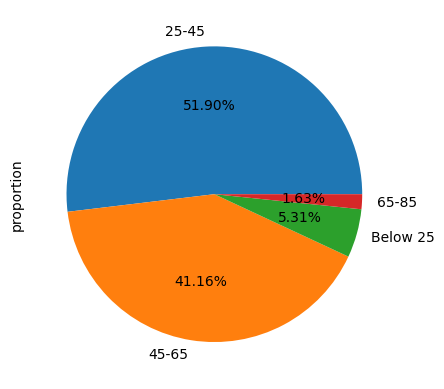

In [64]:
app_df['Age_Category'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

#### Conclusion: Most of the applicants are between 25-45 age group

### Data Imbalance Check

In [65]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### Dividing application dataset with target variable as 0 and 1

In [66]:
tar_0 = app_df[app_df.TARGET==0]
tar_1 = app_df[app_df.TARGET==1]

In [67]:
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

##### Conclusion: 1 out of 9 or 10 applicants are defaulters

### Univariate Analysis

In [68]:
categorical_cols = list(app_df.columns[app_df.dtypes==object])
numerical_cols = list(app_df.columns[app_df.dtypes==np.int64]) + list(app_df.columns[app_df.dtypes==np.float64])

In [69]:
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [70]:
numerical_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


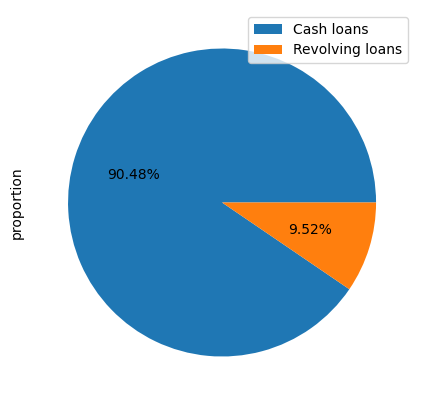

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


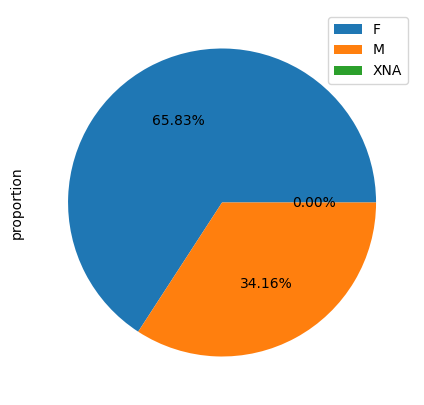

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


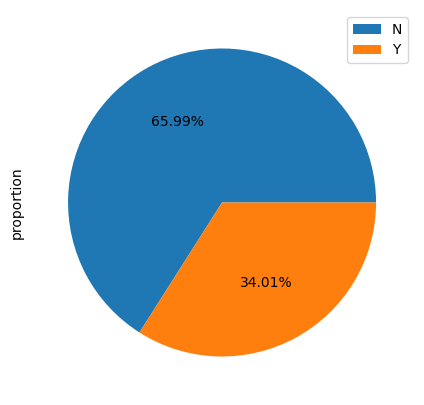

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


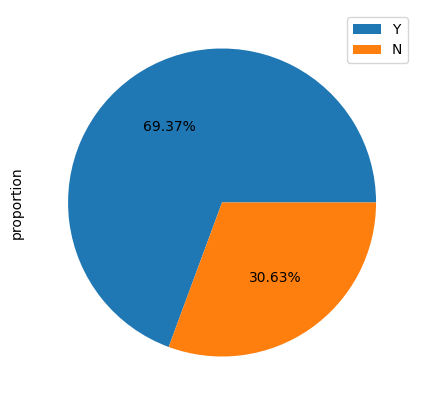

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


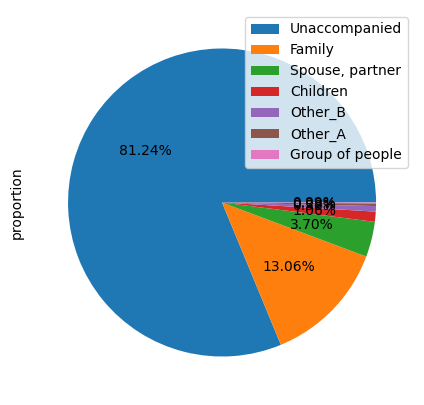

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


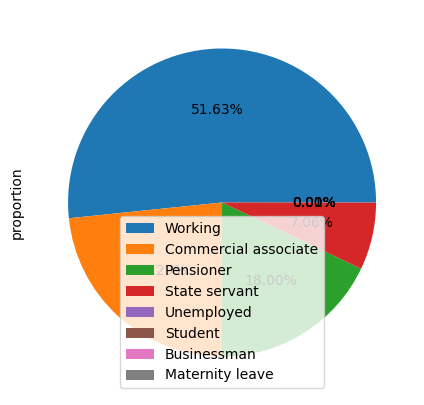

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


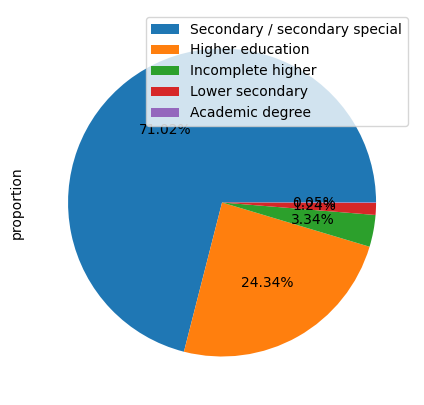

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


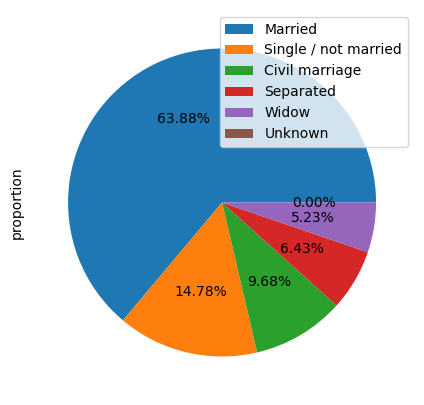

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


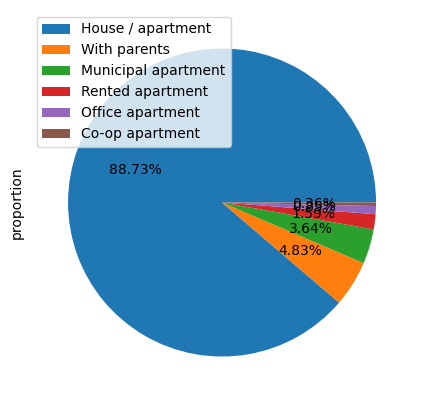

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


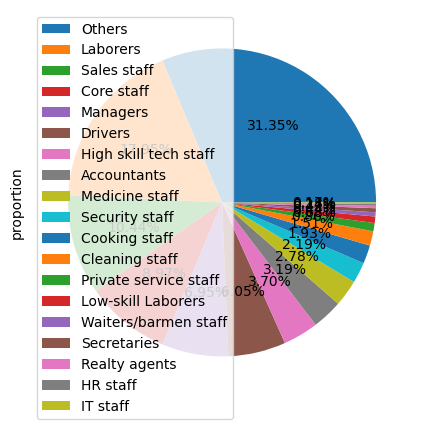

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


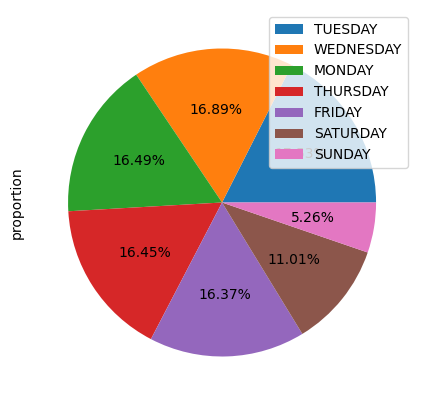

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

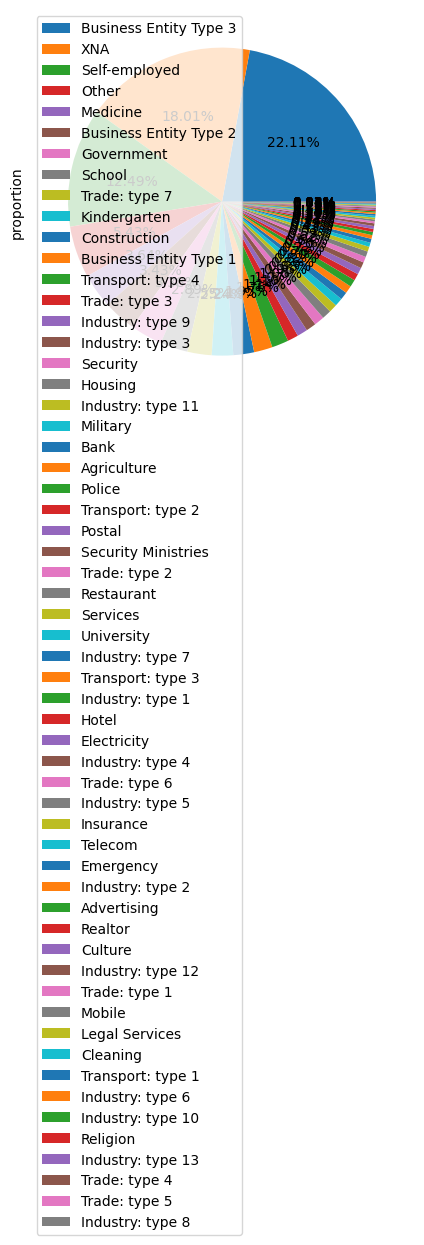

In [71]:
for col in categorical_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=(5,5))
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance= None,autopct="%1.2f%%")
    plt.legend()
    plt.show()

- Conclusion >> Insights on below cols
  1. NAME_CONTRACT_TYPE : More applicantions have cash loans than revolving loans
  2. CODE_GENDER : No.of female applicants are twice than male applicants
  3. FLAG_OWN_CAR : 70% of the applicants do not own a car
  4. FLAG_OWN_REALITY: 70% of the applicants do not own a house
  5. NAME_TYPE_SUITE: 81% of the applicants are unaccompanied
  6. NAME_INCOME_TYPE : 51% of the applicants are earning their income from work
  7. NAME_EDUCATION_TYPE: 71% of the applicants have completed secondary/secondary special education
  8. NAME_FAMILY_STATUS: 63% of the applicants are married
  9. NAME_HOUSING_TYPE: 88% of the applicants are living in house/apartment
  10. OCCUPATION_TYPE: 31% of the applicants have other occupation type
  11. WEEKDAY_APPR_PROCESS_START: 17% of the applicants have applied the loan on tuesday.
  12. ORGANIZATION_TYPE: 22% of the employee's organization type is business entity type3

#### Plot on numerical columns

##### Categorize cols with and without flags

In [72]:
num_cols_with_flag = []
num_cols_without_flag = []
for col in numerical_cols:
    if col.startswith("FLAG"):
        num_cols_with_flag.append(col)
    else:
        num_cols_without_flag.append(col)

In [73]:
num_cols_with_flag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [74]:
num_cols_without_flag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


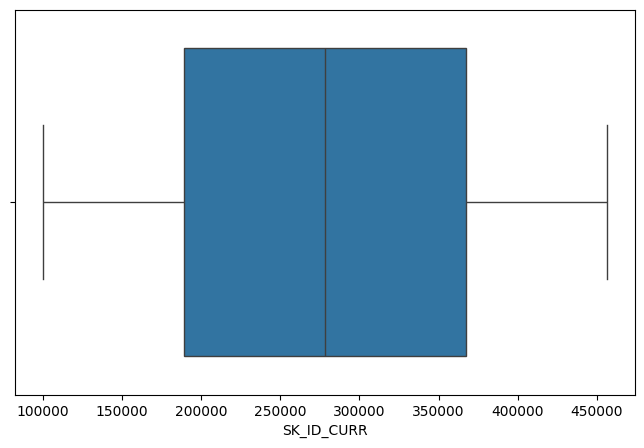

-----------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


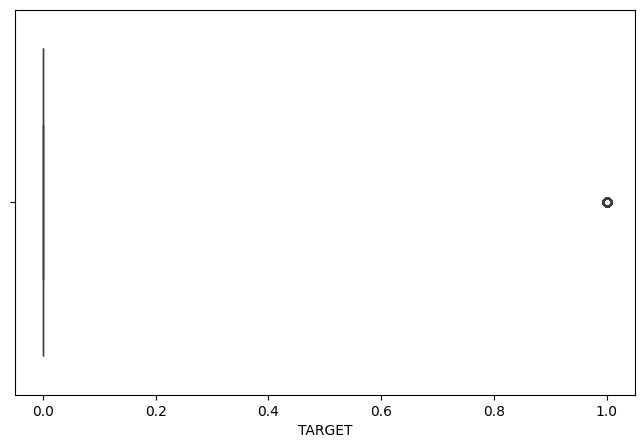

-----------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


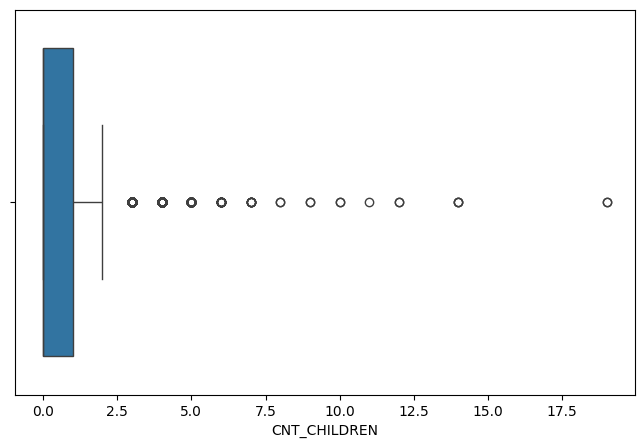

-----------------------
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


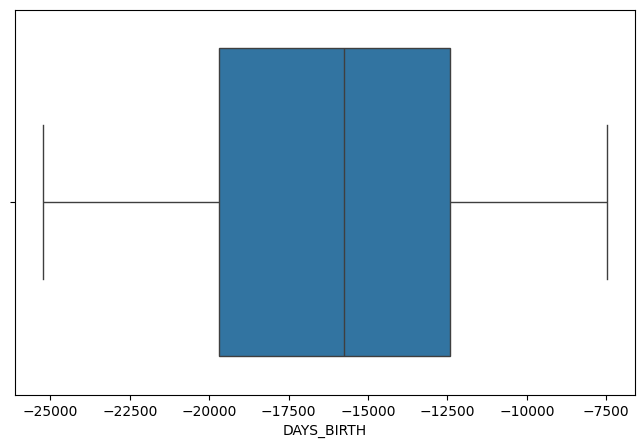

-----------------------
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


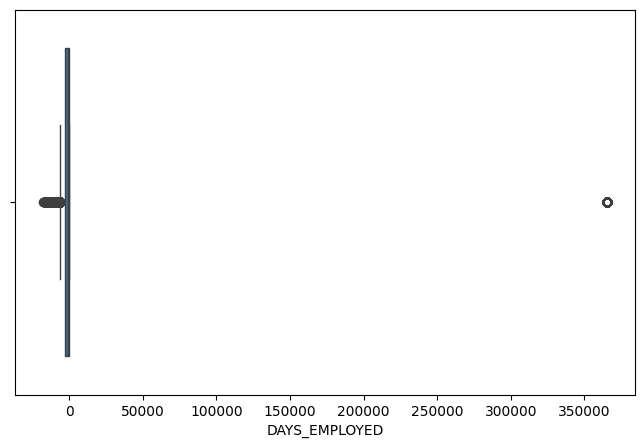

-----------------------
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


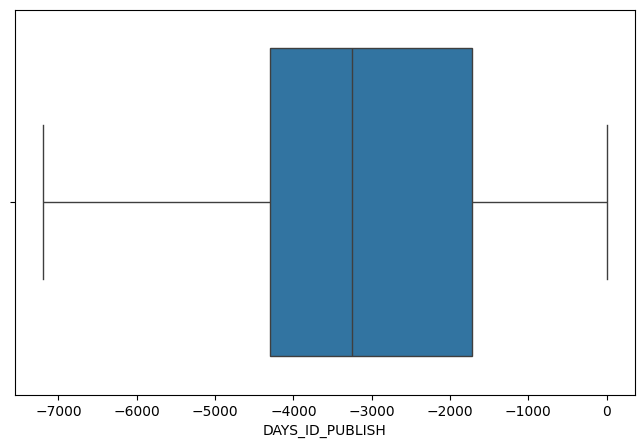

-----------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


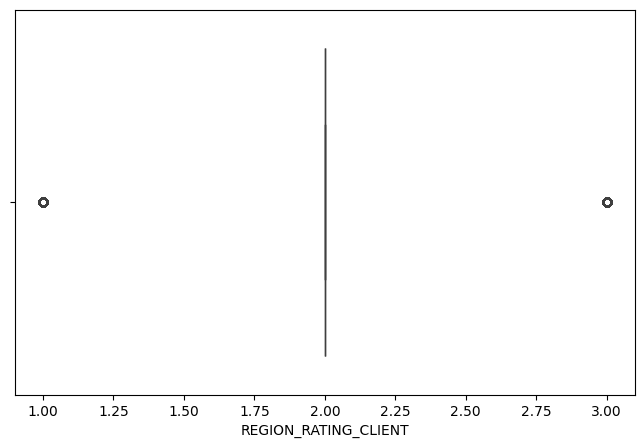

-----------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


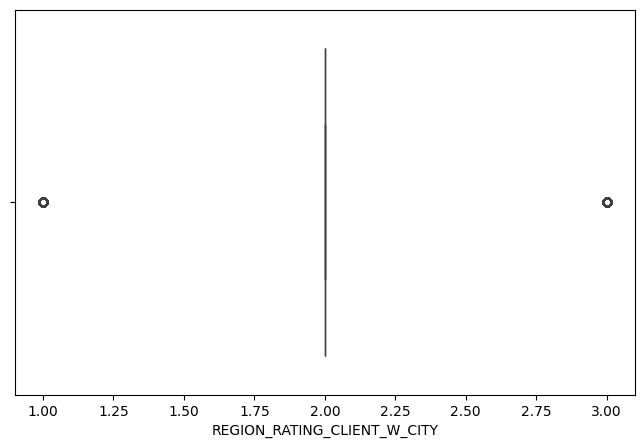

-----------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


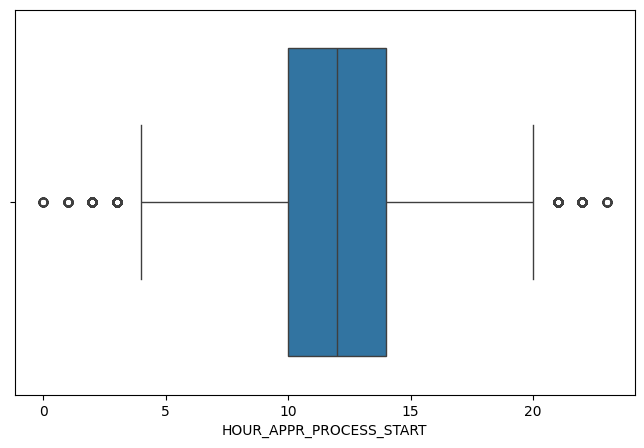

-----------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


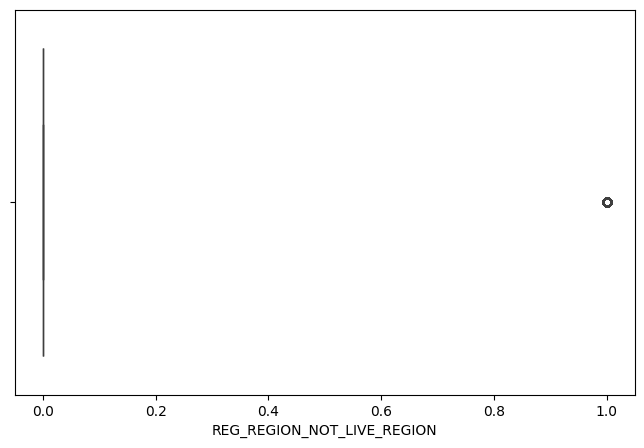

-----------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


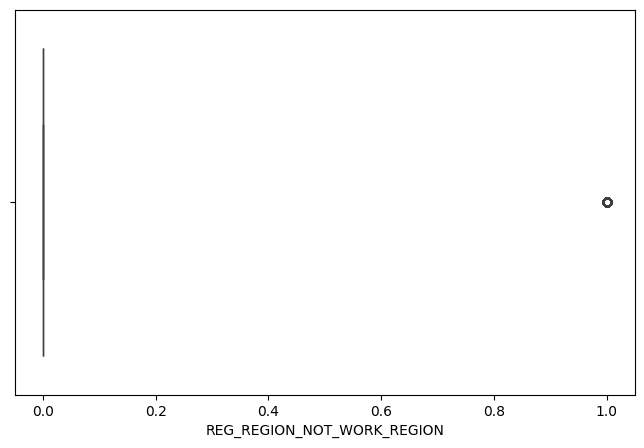

-----------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


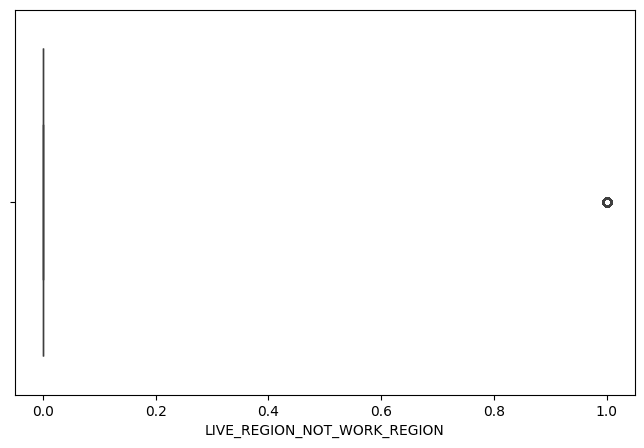

-----------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


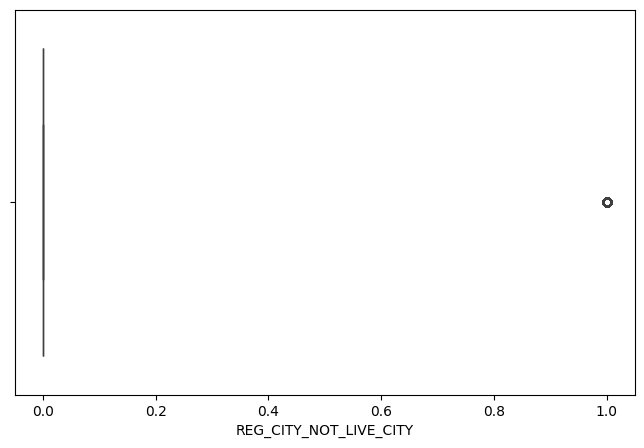

-----------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


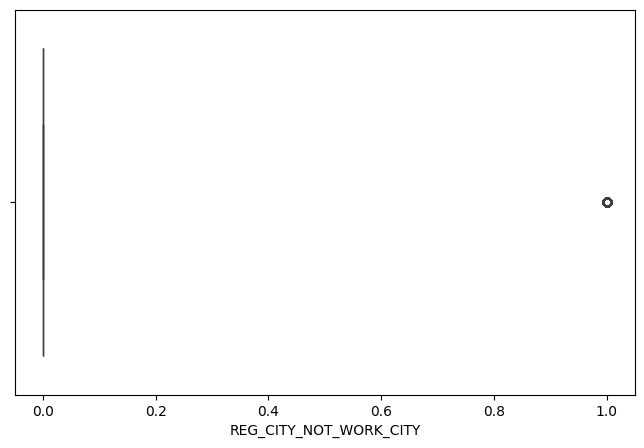

-----------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


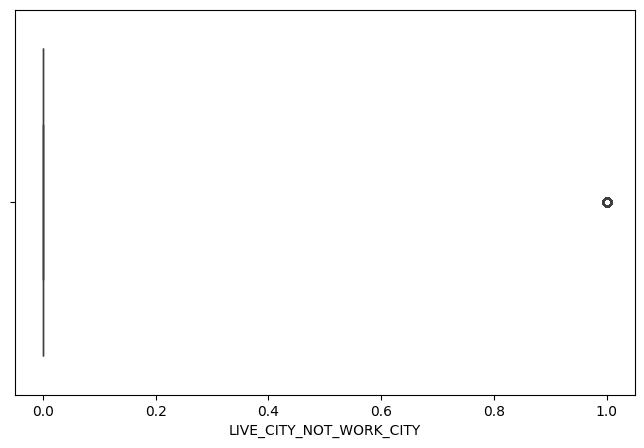

-----------------------
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


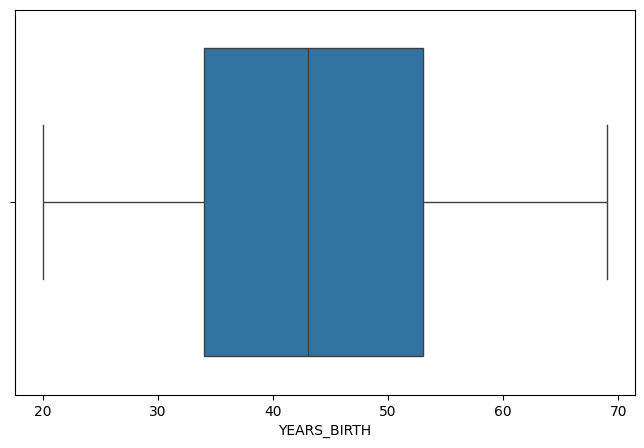

-----------------------
count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


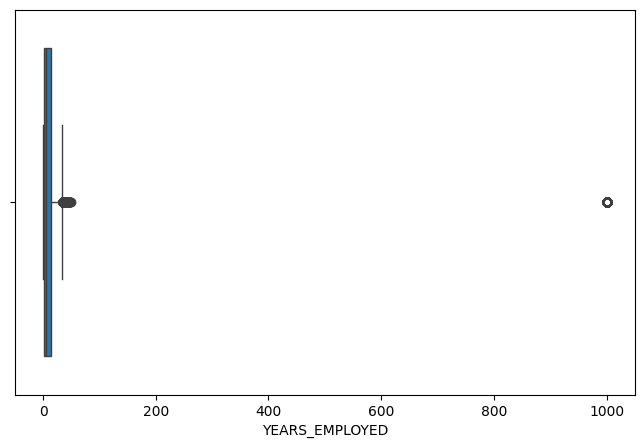

-----------------------
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


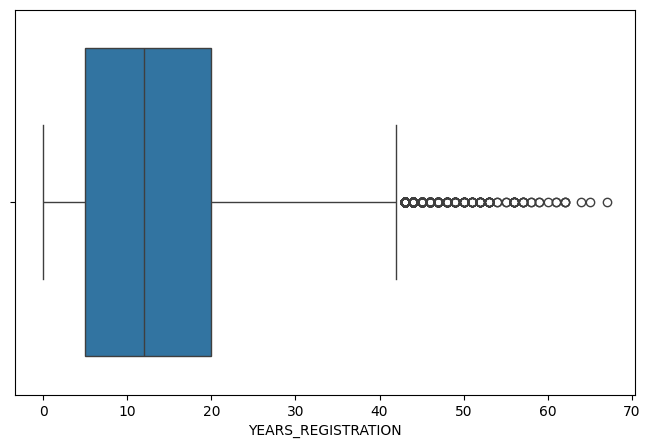

-----------------------
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


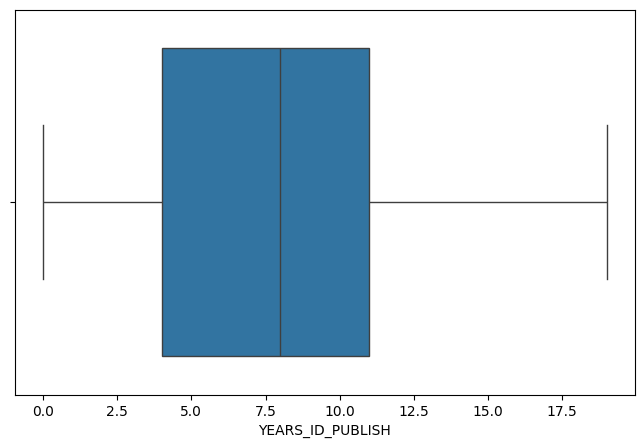

-----------------------
count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


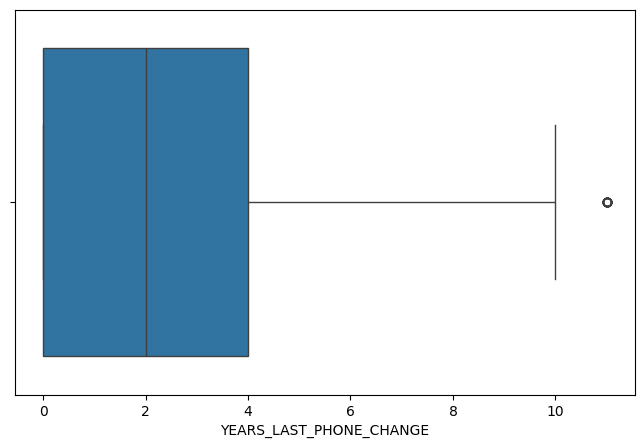

-----------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


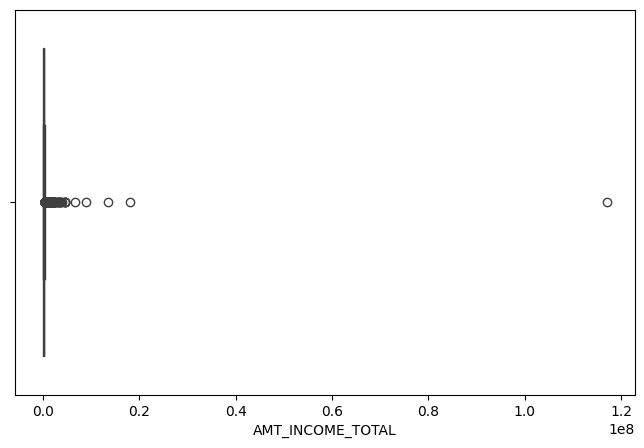

-----------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


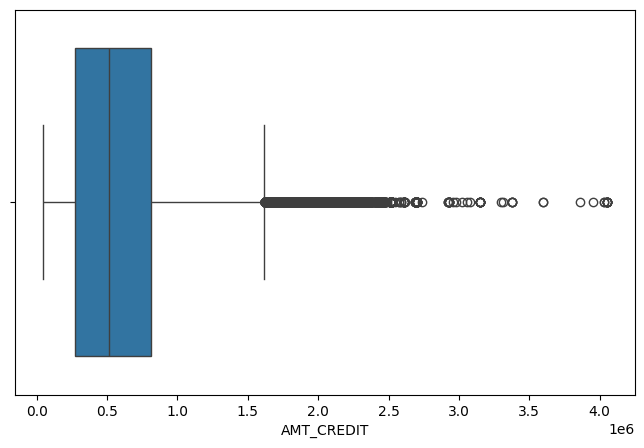

-----------------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


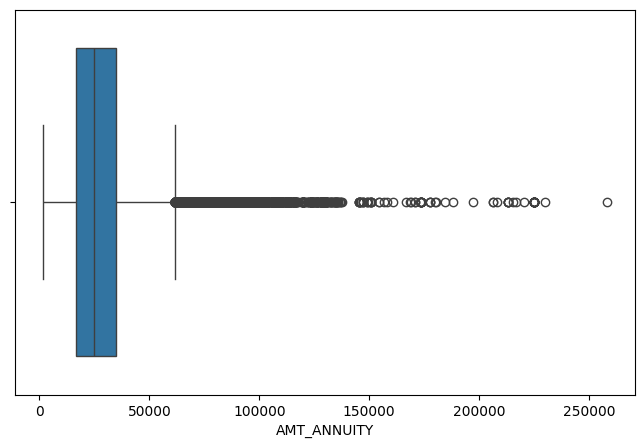

-----------------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


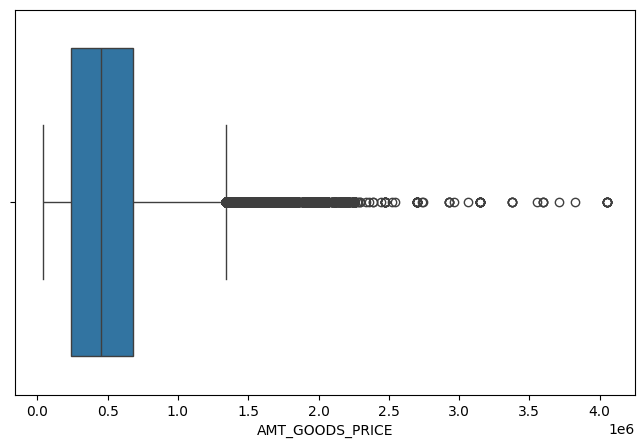

-----------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


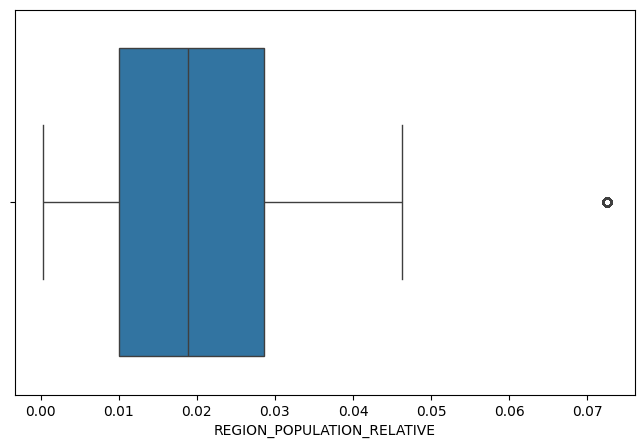

-----------------------
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


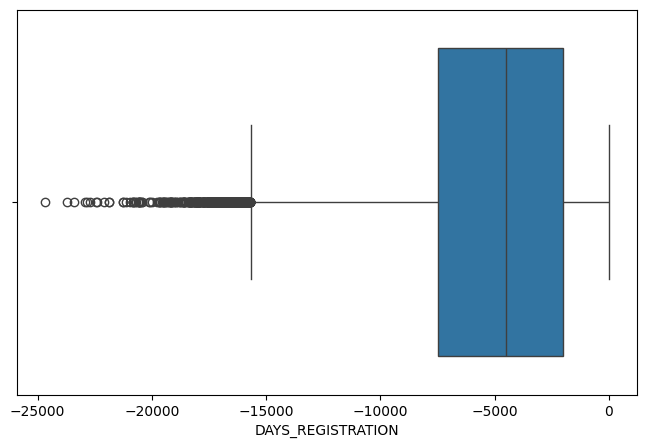

-----------------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


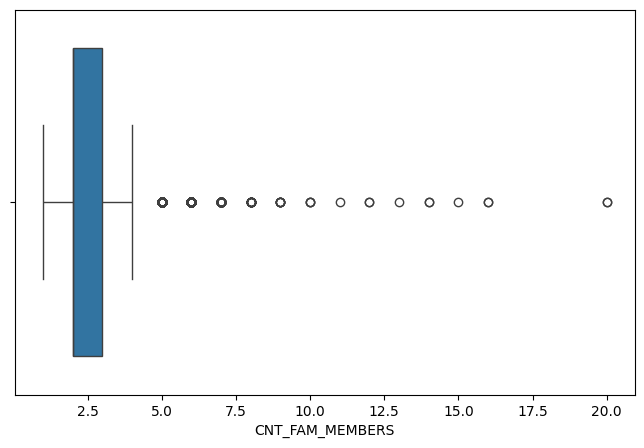

-----------------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


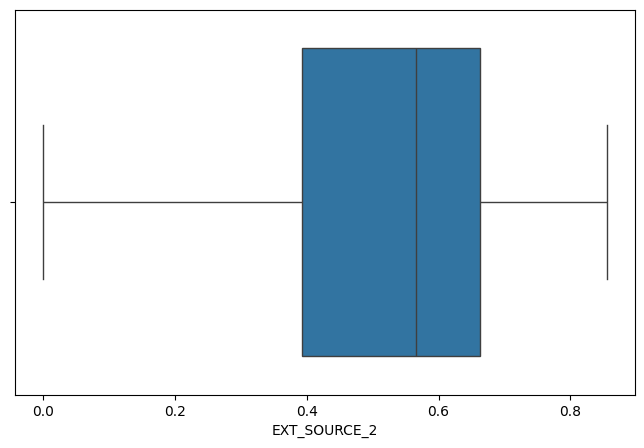

-----------------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


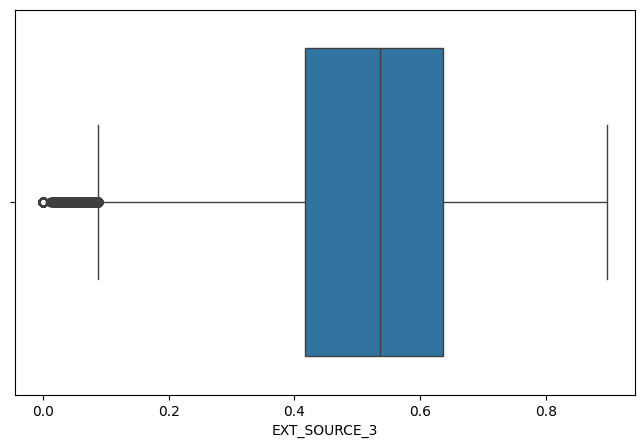

-----------------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


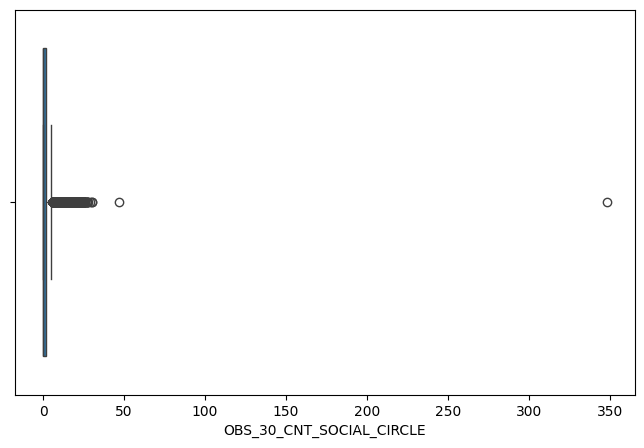

-----------------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


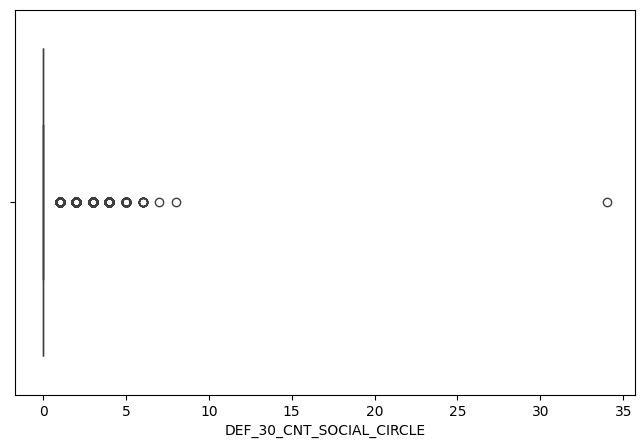

-----------------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


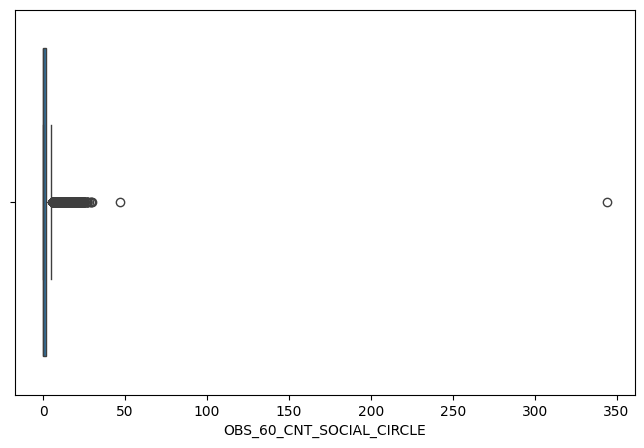

-----------------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


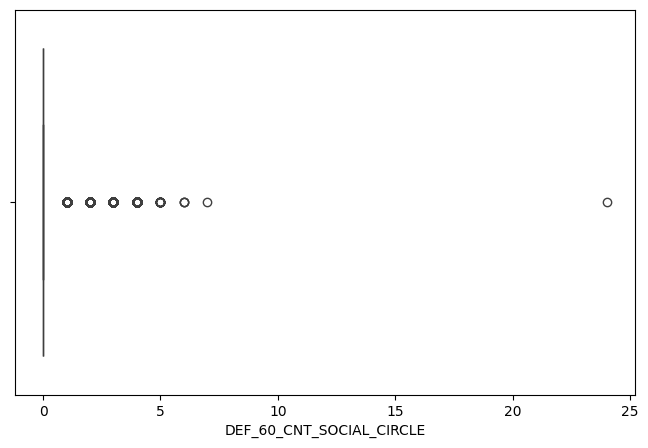

-----------------------
count    307511.000000
mean       -962.858119
std         826.807226
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


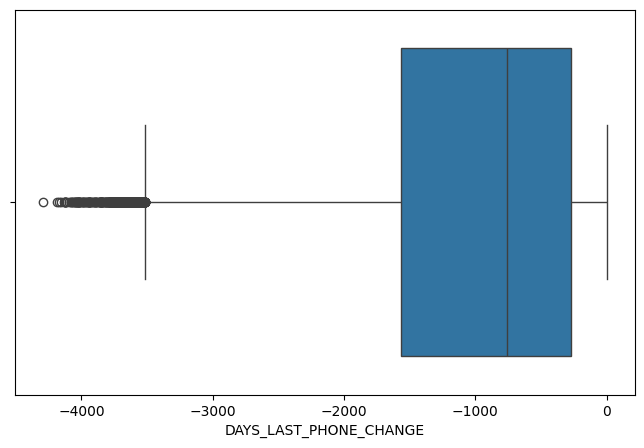

-----------------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


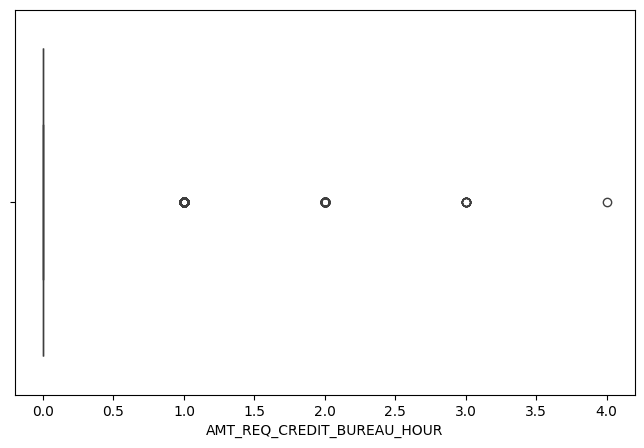

-----------------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


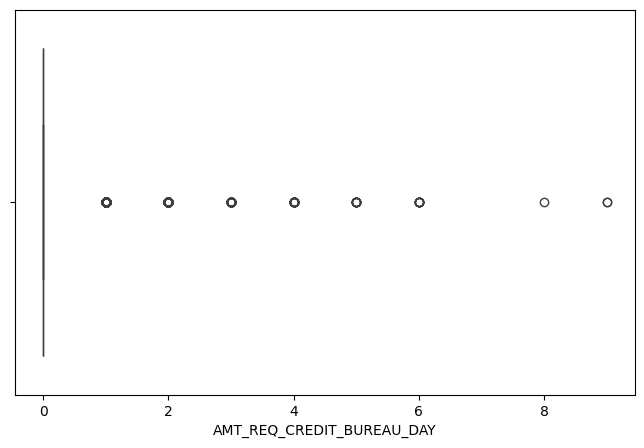

-----------------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


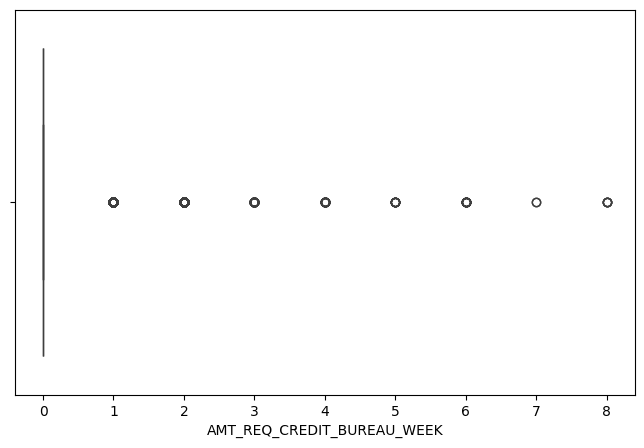

-----------------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


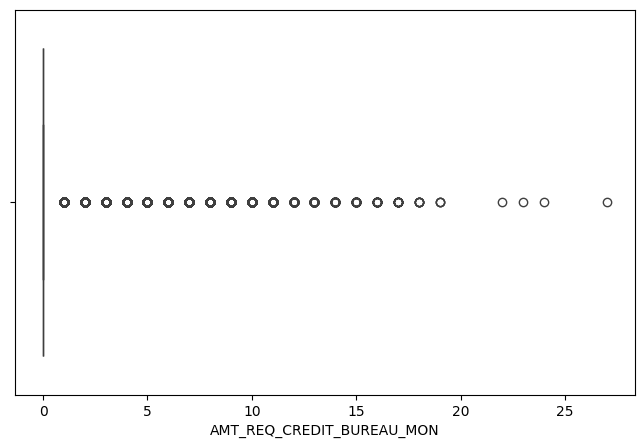

-----------------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


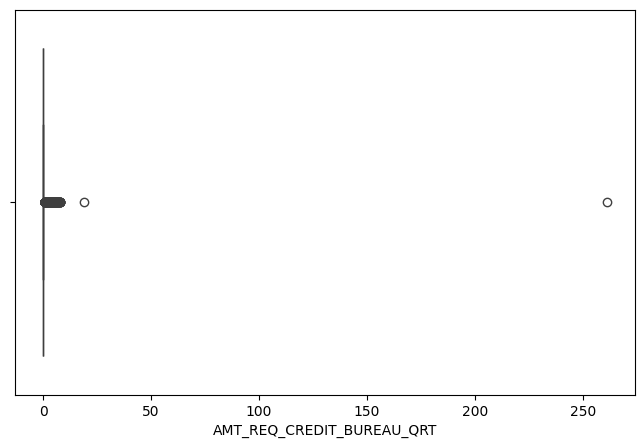

-----------------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


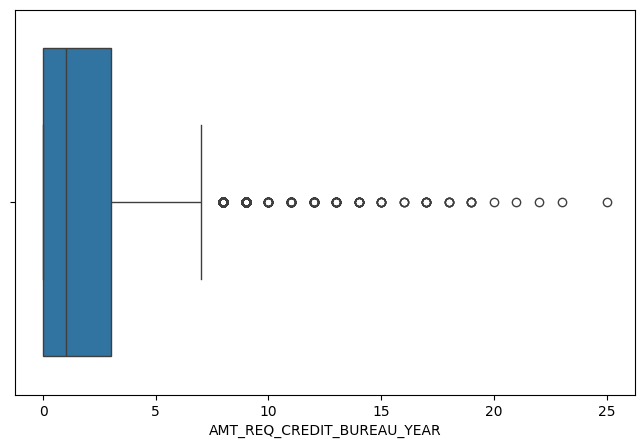

-----------------------


In [75]:
for col in num_cols_without_flag:
    print(app_df[col].describe())
    plt.figure(figsize=(8,5))
    sns.boxplot(data=app_df, x=col)
    plt.show()
    print("-----------------------")

- Conclusion: Few columns are with outliers are below
1. AMT_INCOME_TOTAL col has a few outliers and there is a huge diff b/w 99th percentile and max value, also we could see huge variation 
in mean and median due to outliers
2. AMT_CREDIT col has few outliers and there is a huge diff b/w 99th percentile and max value, also we could see huge variation 
in mean and median due to outliers
3. AMT_ANNUITY  col has few outliers and there is a huge diff b/w 99th percentile and max value, also we could see huge variation 
in mean and median due to outliers
4. AMT_GOODS_PRICE  col has few outliers and there is a huge diff b/w 99th percentile and max value, also we could see huge variation 
in mean and median due to outliers
5. REGION_POPULATION_RELATIVE col has one outlier and ther's no much diff b/w mean and median

#### univariate analysis on cols with target 0 and 1

plot on NAME_CONTRACT_TYPE for Target 0 and 1


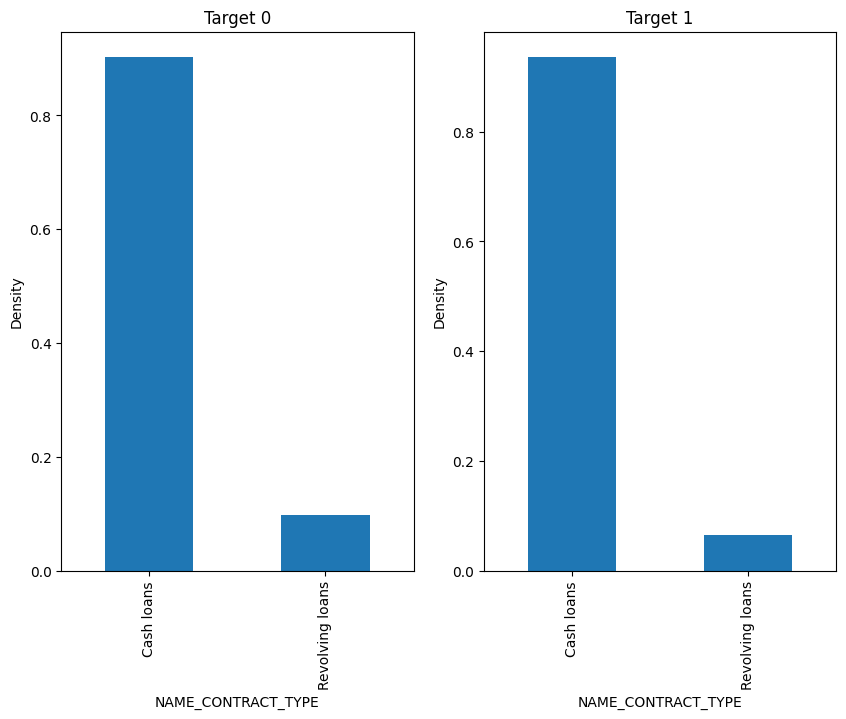



 ------------------------------------------------------- 


plot on CODE_GENDER for Target 0 and 1


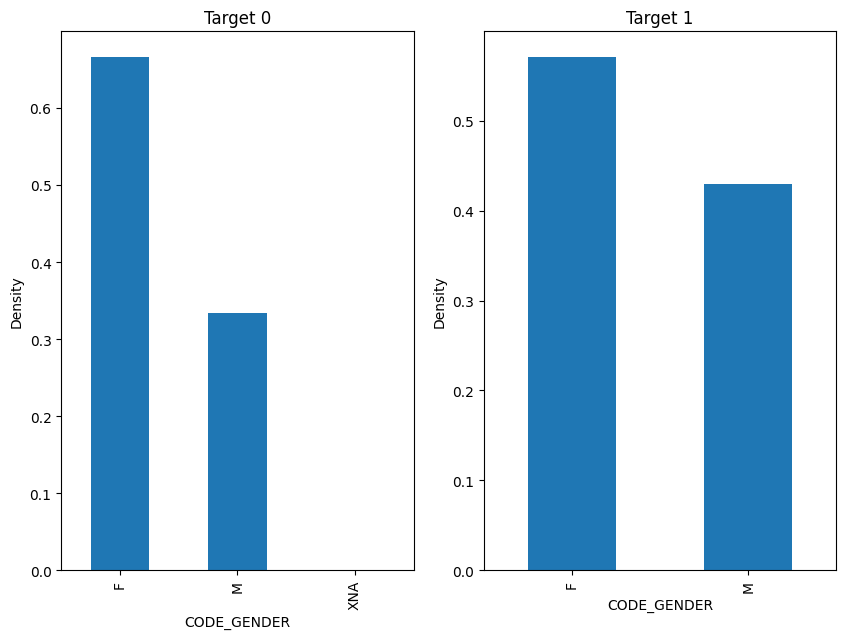



 ------------------------------------------------------- 


plot on FLAG_OWN_CAR for Target 0 and 1


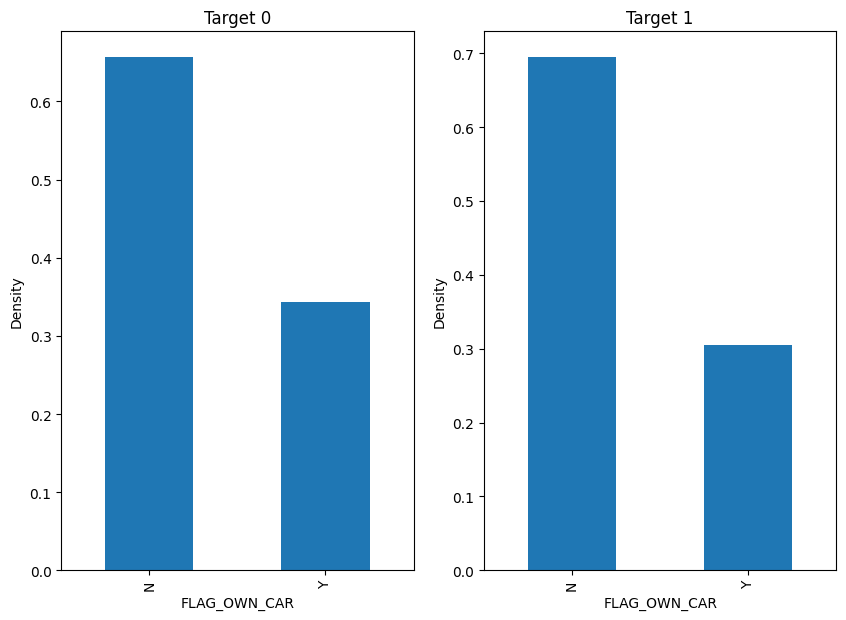



 ------------------------------------------------------- 


plot on FLAG_OWN_REALTY for Target 0 and 1


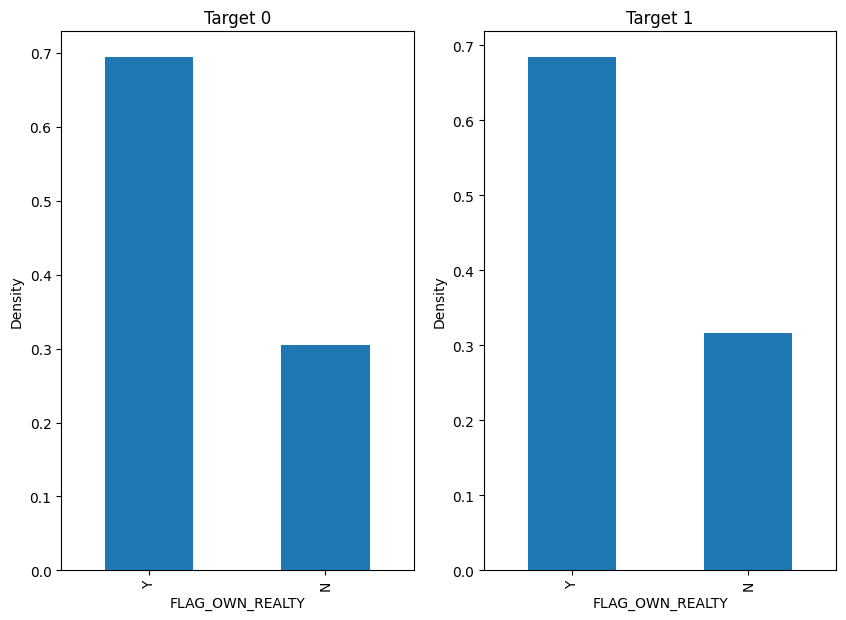



 ------------------------------------------------------- 


plot on NAME_TYPE_SUITE for Target 0 and 1


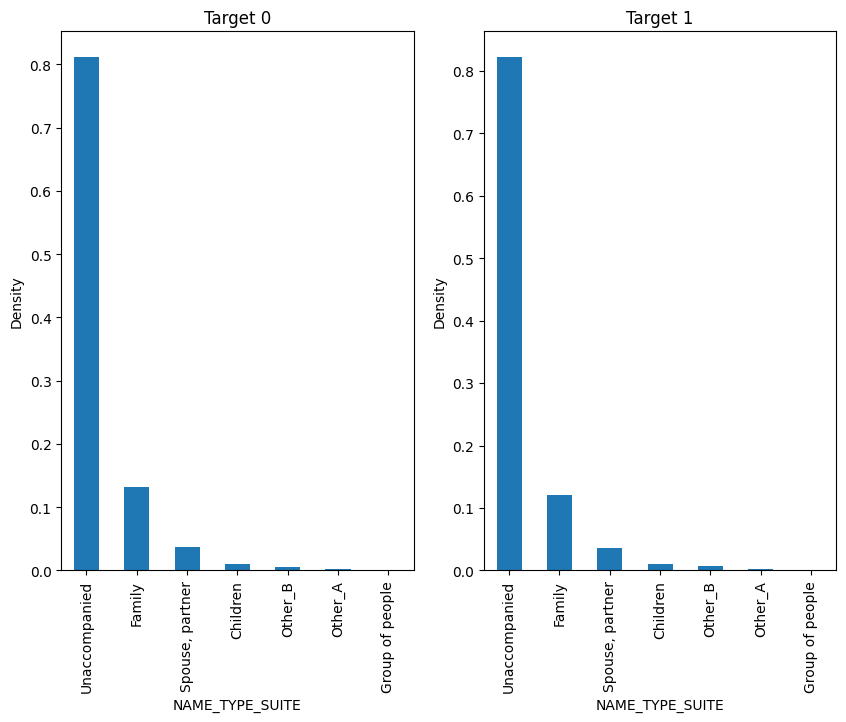



 ------------------------------------------------------- 


plot on NAME_INCOME_TYPE for Target 0 and 1


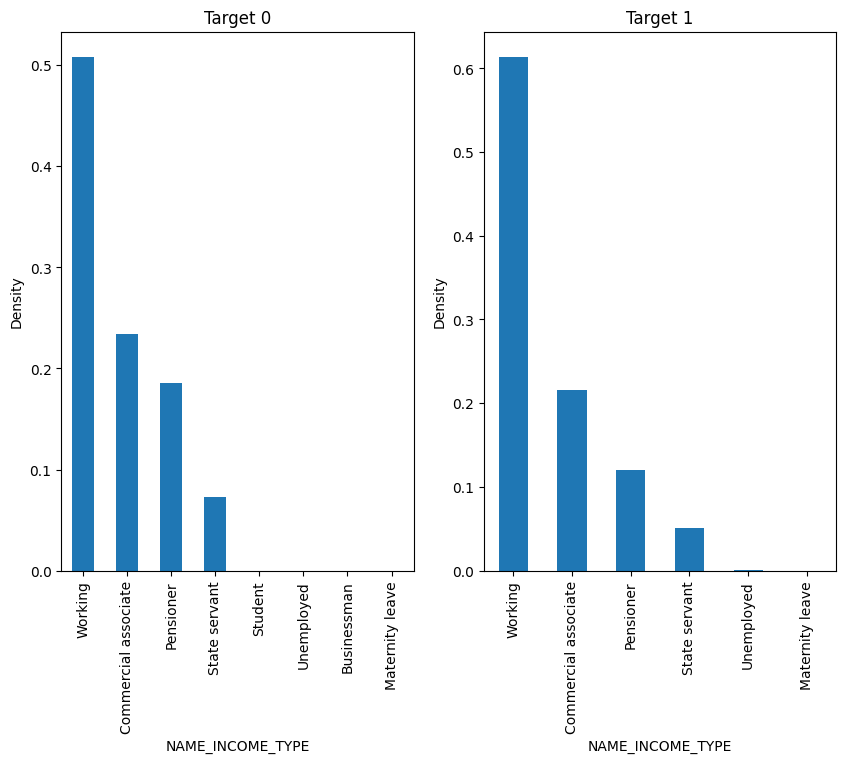



 ------------------------------------------------------- 


plot on NAME_EDUCATION_TYPE for Target 0 and 1


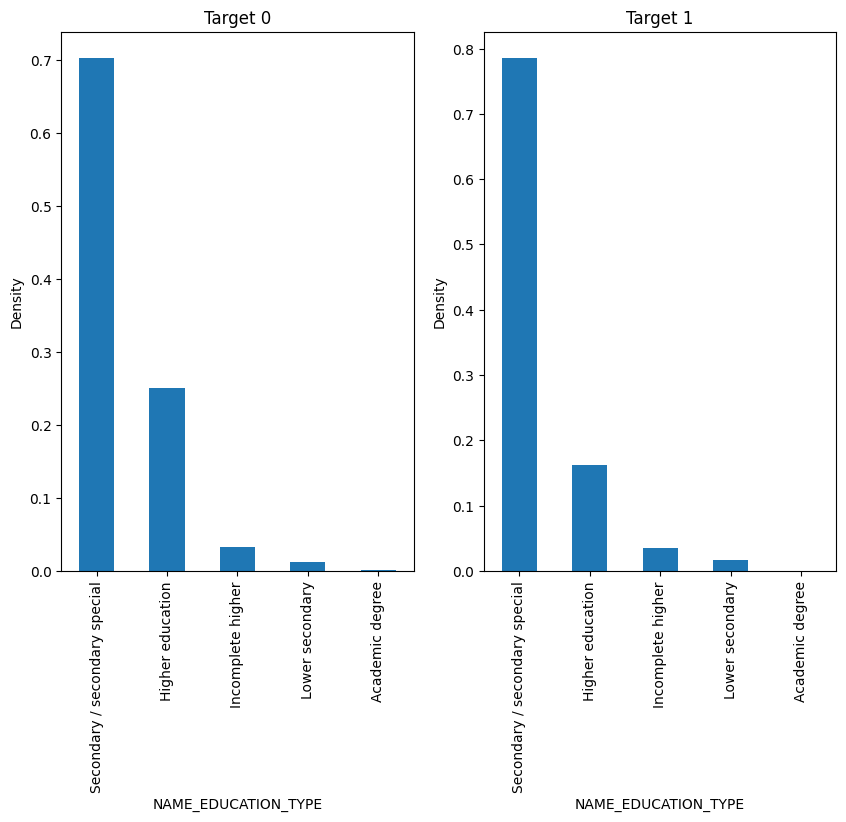



 ------------------------------------------------------- 


plot on NAME_FAMILY_STATUS for Target 0 and 1


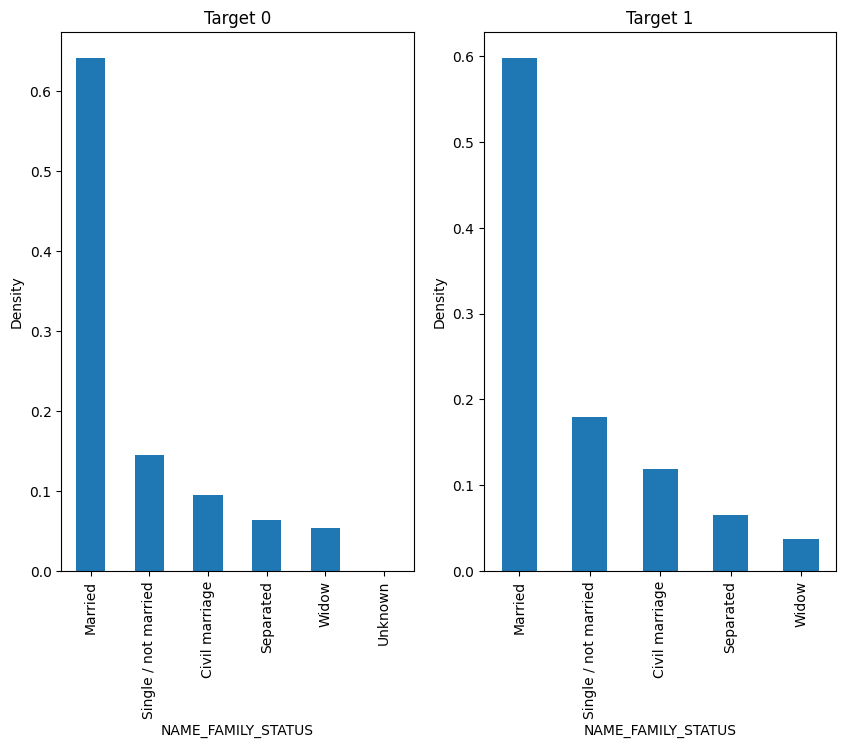



 ------------------------------------------------------- 


plot on NAME_HOUSING_TYPE for Target 0 and 1


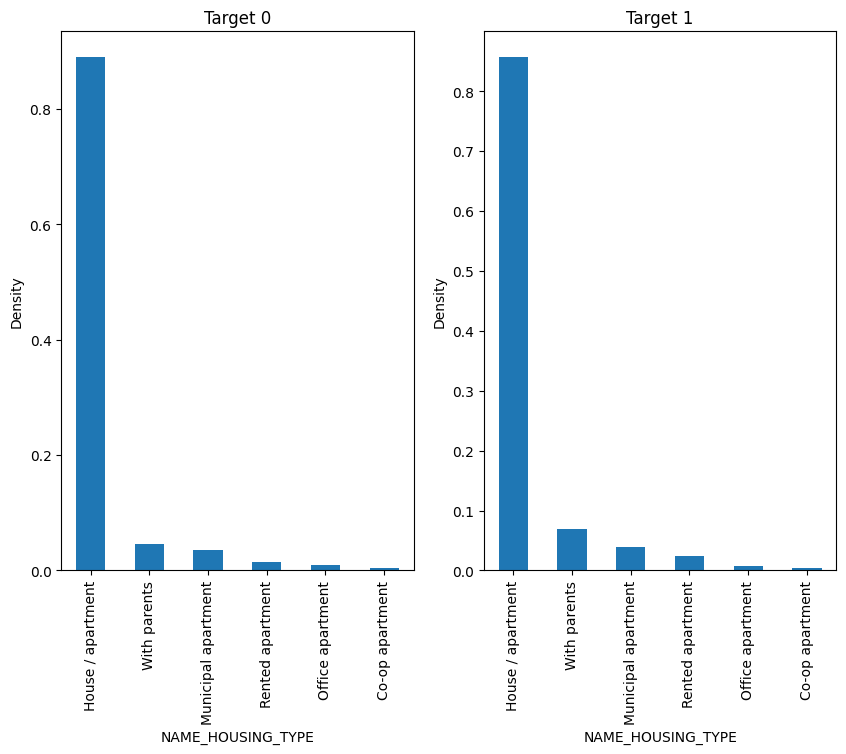



 ------------------------------------------------------- 


plot on OCCUPATION_TYPE for Target 0 and 1


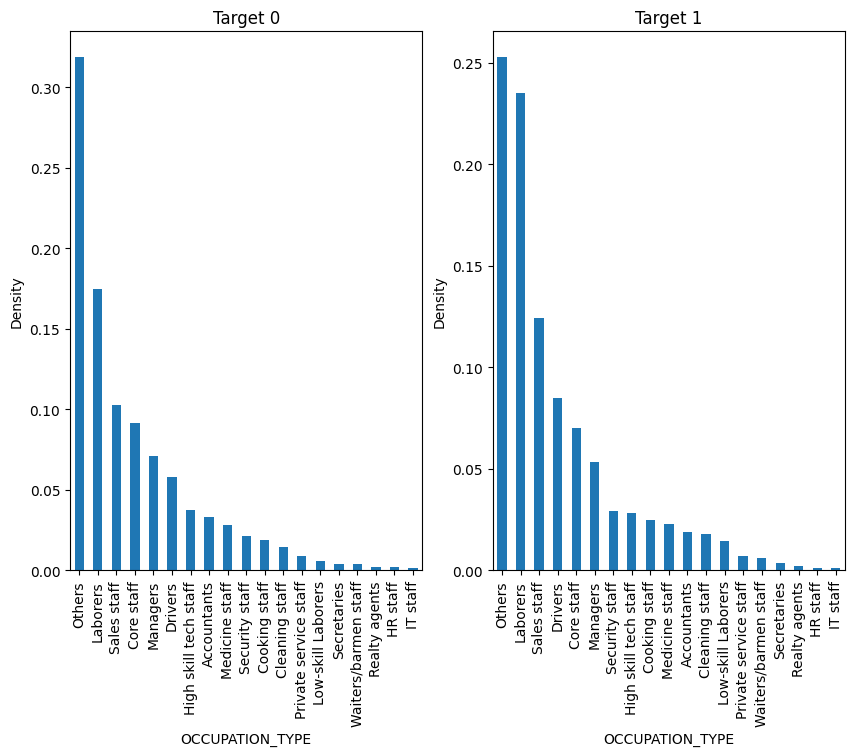



 ------------------------------------------------------- 


plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


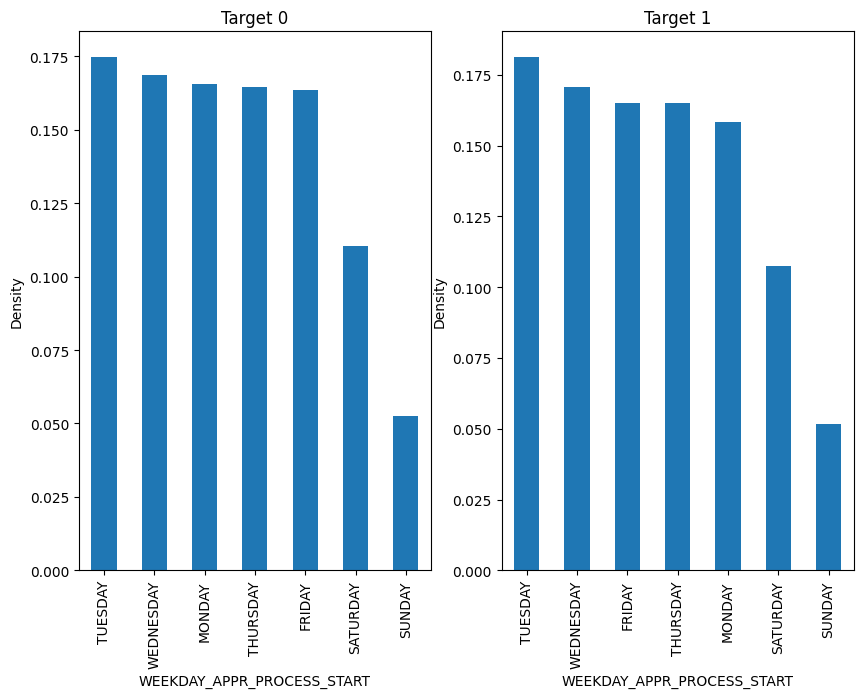



 ------------------------------------------------------- 


plot on ORGANIZATION_TYPE for Target 0 and 1


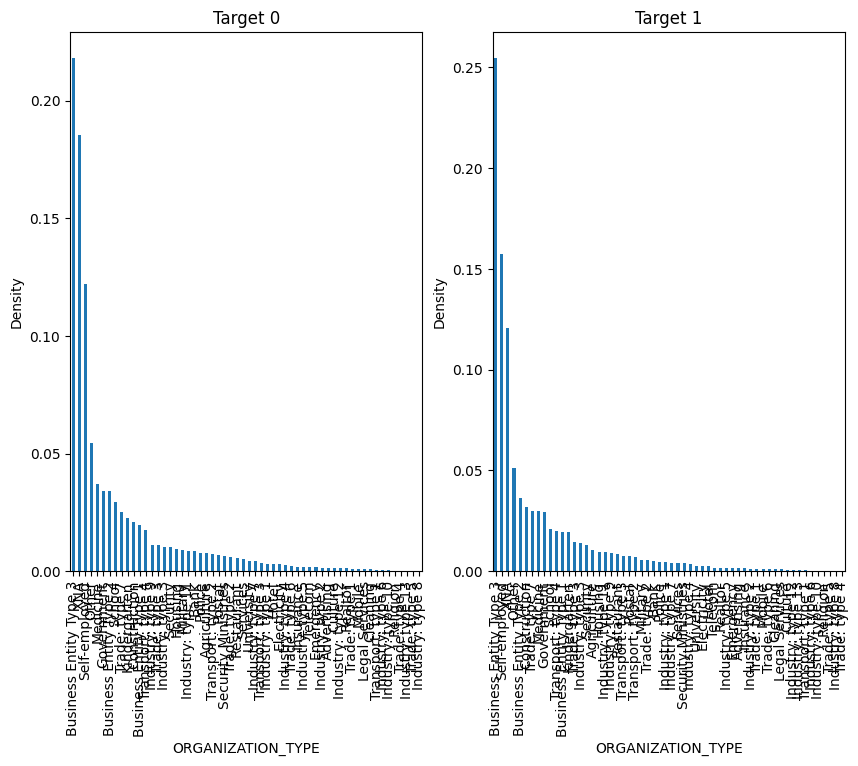



 ------------------------------------------------------- 




In [76]:
for col in categorical_cols:
    print(f"plot on {col} for Target 0 and 1")
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n ------------------------------------------------------- \n\n")

- Conclusion: Below are column insights
- 1. NAME_CONTRACT_TYPE: Applicants are receiving more cashloans than revolving loans for both target 0 and 1
  2. CODE_GENDER:  No.of female applicants are twice than male applicants for both target 0 and 1
  3. FLAG_OWN_CAR : 70% of the applicants do not own a car for both target 0 and 1
  4. FLAG_OWN_REALITY: 70% of the applicants do not own a house for both target 0 and 1
  5. NAME_TYPE_SUITE: 81% of the applicants are unaccompanied for both target 0 and 1
  6. NAME_INCOME_TYPE : 51% of the applicants are earning their income from work for both target 0 and 1
  7. NAME_EDUCATION_TYPE: 71% of the applicants have completed secondary/secondary special education for both target 0 and 1
  8. NAME_FAMILY_STATUS: 63% of the applicants are married for both target 0 and 1
  9. NAME_HOUSING_TYPE: 88% of the applicants are living in house/apartment for both target 0 and 1
  10. OCCUPATION_TYPE: 31% of the applicants have other occupation type, are non defaulters,labourers,sales staff,drivers and core staff are not able to repay their loan on time
  11. WEEKDAY_APPR_PROCESS_START: 17% of the applicants have applied the loan on tuesday and least on sunday for both target 0 and 1
  12. ORGANIZATION_TYPE: 22% of the employee's organization type is business entity type3 , self employed and others organization type for both target 0 and 1

#### Analysis on AMT_GOODS_PRICE on target 0 and 1

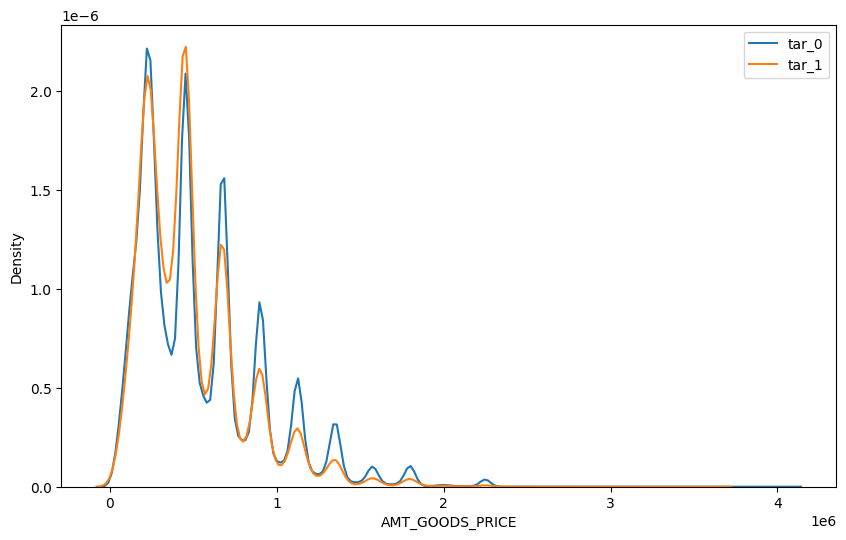

In [76]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'],label='tar_0',hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'],label='tar_1',hist=False)
plt.legend()
plt.show()

- Conclusion: The price of the goods for which loan is given has the same variation for Target 0 and 1

### Bivariate and Multivariate Analysis 

#### Bivariate Analysis b/w WEEKDAY_APPR_PROCESS_START vs  HOUR_APPR_PROCESS_START

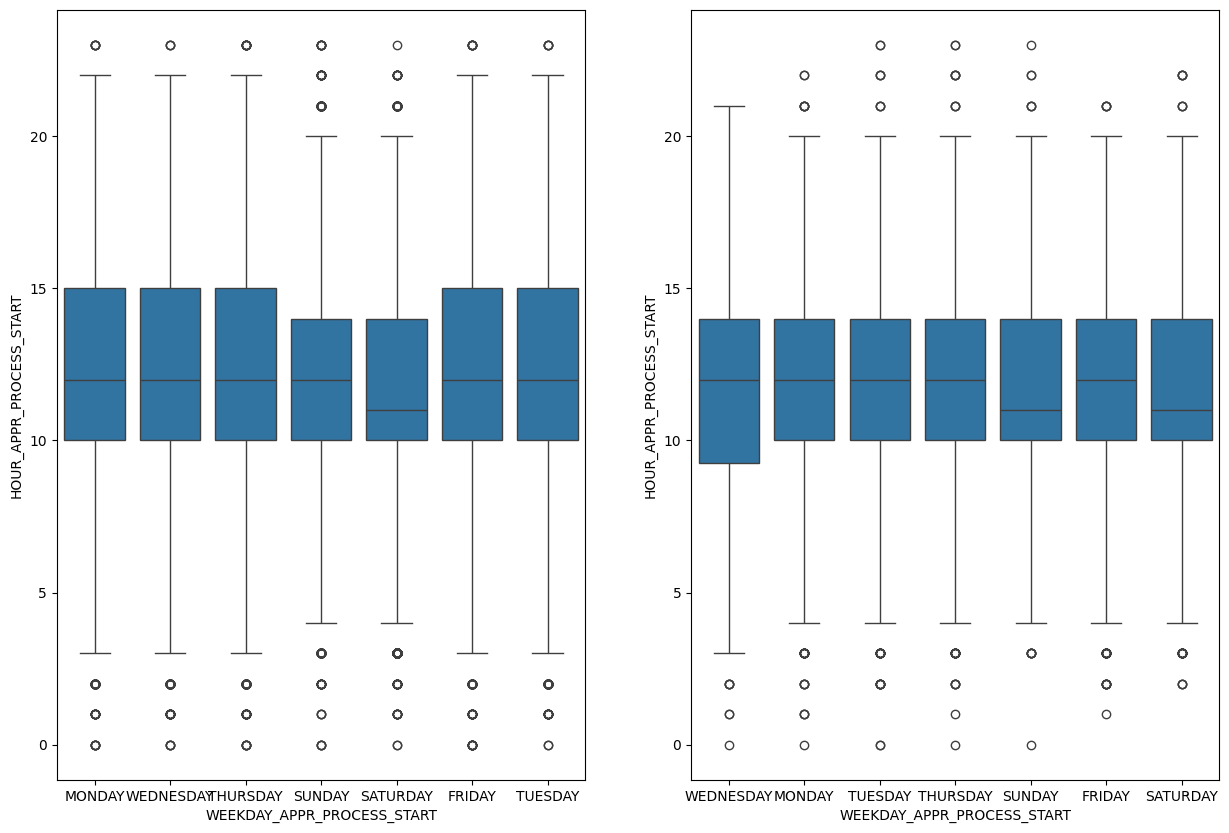

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START",data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START",data=tar_1)
plt.show()

- Conclusion:
- 1. The bank operates b/w 10am to 3pm except for saturday and sunday, its b/w 10am to 2pm
  2. we can observe that around 11:30 am to 12pm, around 50% of cutomers visit the branch for laon application on all the days except for saturday
     where the time is b/w 10am to 11am for both target 0 and 1.
  3. loan defualters have applied the laon b/w 9:30 am-10am and 2pm where as the applicants who repay the laon on time have applied for the laon b/w
     10 am to 3pm

### Bivariate Analysis b/w Age_category vs AMT_CREDIT

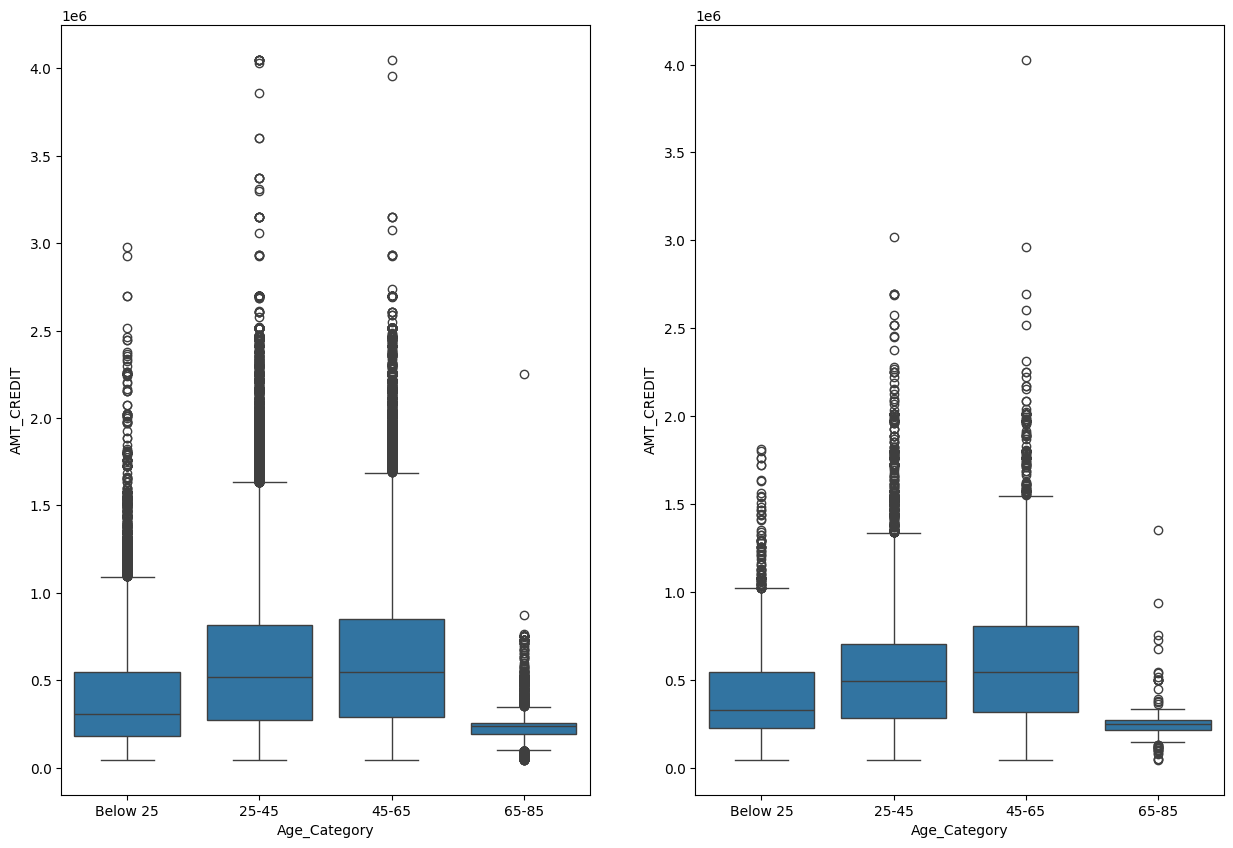

In [78]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="Age_Category", y="AMT_CREDIT",data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="Age_Category", y="AMT_CREDIT",data=tar_1)
plt.show()

- Conclusion:
- 1. The applicants b/w age group 25 to 65 have credit amount of the laon less than 2500000 and are not able to repay the loan properly
  2. The applicants with less than 100000 credit amount are with age group greater than 65 may be considered as loan defaulters
  3. most applicants who have credit amount of loan less than 1700000 are loan defaulters with 25 and less age

#### Pair plot of Amount cols for target 0

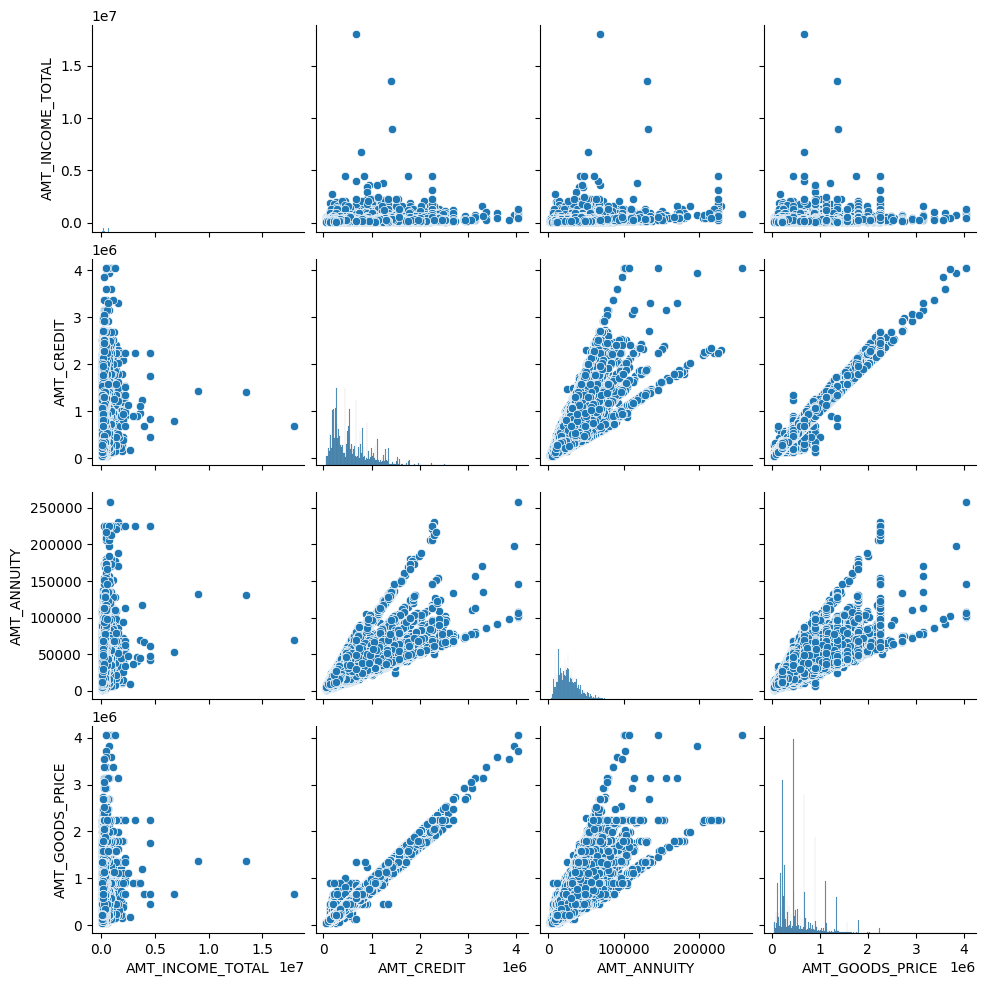

In [79]:
sns.pairplot(tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

- Conclusion: For applicants who are able to repay the loan on time
- 1. AMT_CREDIT increases or varies linearity with AMT_GOODS_PRICE and AMT_CREDIT increases with AMT_ANNUITY
  2. AMT_ANNUITY increases with  increase in AMT_GOODS_PRICE and AMT_CREDIT
  3. AMT_GOODS_PRICE increases with  increase in  AMT_CREDIT and AMT_ANNUITY
  4. AMT_INCOME_TOTAL has a drastic increase with slight increase in AMT_CREDIT,AMT_ANNUITY and AMT_GOODS_PRICE

#### Pair plot of amount cols for target 1

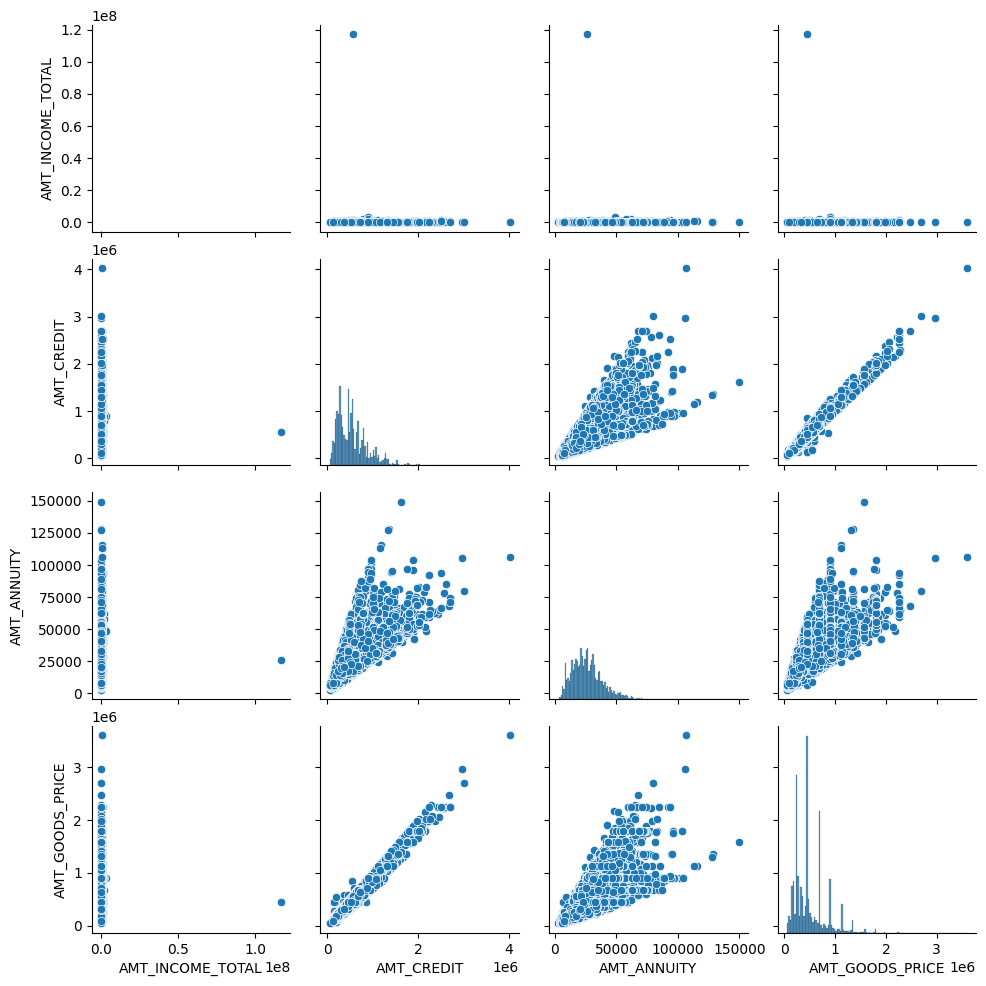

In [80]:
sns.pairplot(tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

- Conclusion: For applicants who are able to repay the loan on time
- 1. AMT_CREDIT increases or varies linearity with AMT_GOODS_PRICE and AMT_CREDIT increases with AMT_ANNUITY
  2. AMT_ANNUITY increases with  increase in AMT_GOODS_PRICE and AMT_CREDIT
  3. AMT_GOODS_PRICE increases with  increase in  AMT_CREDIT and AMT_ANNUITY
  4. AMT_INCOME_TOTAL has a drastic increase with slight increase in AMT_CREDIT,AMT_ANNUITY and AMT_GOODS_PRICE

#### Correlation b/w numerical cols

In [81]:
corr_data = app_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",'YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION',
                    'YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           25   
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                   9                 5   
1               3                   3                 0   
2               0                  11                 6   
3               8                  26                 6   
4               8                  11                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [82]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_BIRTH                     -0.027226    0.055408    -0.009453   
YEARS_EMPLOYED                  -0.063836   -0.064319    -0.102853   
YEARS_REGISTRATION              -0.027783   -0.009521    -0.038375   
YEARS_ID_PUBLISH                -0.008648    0.006831    -0.011100   
YEARS_LAST_PHONE_CHANGE          0.018592    0.077057     0.064893   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027226       -0.063836   
AMT_CREDIT                      0.986734     0.055408       -0.064319   
AMT_ANNUITY                     0.774837    -0.009453       -0.102853   
AMT_GOODS_PRICE                 1.000000     0.053484       -0.062191   
YEARS_BIRTH                     0.053484     1.000000        0.623879   
YEARS_EMPLOYED                 -0.062191     0.623879        1.000000   
YEARS_REGISTRATION             -0.011456     0.331704        0.214592   
YEARS_ID_PUBLISH                0.009571     0.271453        0.274460   
YEARS_LAST_PHONE_CHANGE         0.079095     0.086527       -0.016393   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027783         -0.008648   
AMT_CREDIT                        -0.009521          0.006831   
AMT_ANNUITY                       -0.038375         -0.011100   
AMT_GOODS_PRICE                   -0.011456          0.009571   
YEARS_BIRTH                        0.331704          0.271453   
YEARS_EMPLOYED                     0.214592          0.274460   
YEARS_REGISTRATION                 1.000000          0.101373   
YEARS_ID_PUBLISH                   0.101373          1.000000   
YEARS_LAST_PHONE_CHANGE            0.058831          0.093213   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018592  
AMT_CREDIT                              0.077057  
AMT_ANNUITY                             0.064893  
AMT_GOODS_PRICE                         0.079095  
YEARS_BIRTH                             0.086527  
YEARS_EMPLOYED                         -0.016393  
YEARS_REGISTRATION                      0.058831  
YEARS_ID_PUBLISH                        0.093213  
YEARS_LAST_PHONE_CHANGE                 1.000000

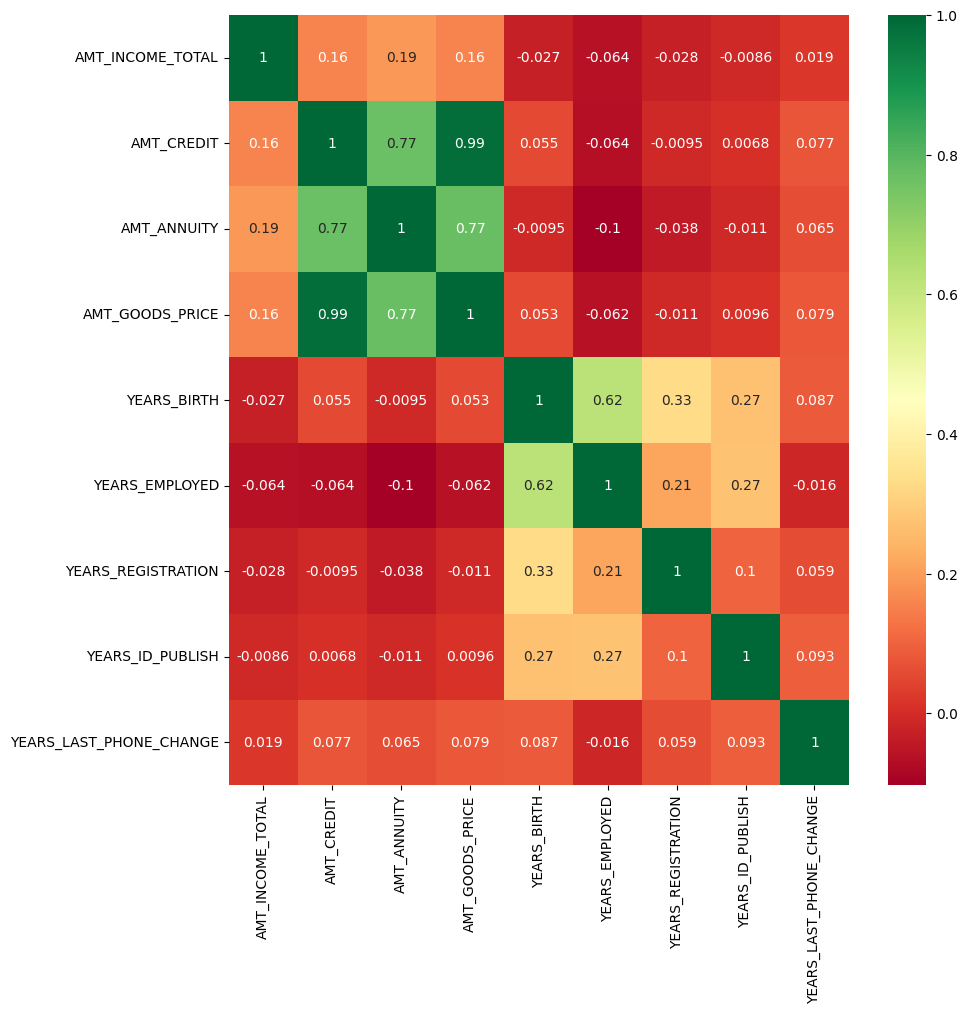

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True, cmap="RdYlGn")
plt.show()

- Conclusion:
- 1. AMT_INCOME_TOTAL: It has a -ve correlation index of 0.064 with YEARS_EMPLOYED and +ve correlation index of 0.16,0.19,0.16 with        AMT_CREDIT,AMT_ANNUITY	and AMT_GOODS_PRICE
  2. AMT_CREDIT: It has a -ve correlation index of 0.064 with YEARS_EMPLOYED and +ve correlation index of 0.77 and 0.99 with AMT_ANNUITY and        AMT_GOODS_PRICE
  3. AMT_ANNUITY: It has a -ve correlation index of 0.1 with  YEARS_EMPLOYED and  +ve correlation index of 0.77 with AMT_CREDIT
  4. AMT_GOODS_PRICE: It has a -ve correlation index of 0.062 with  YEARS_EMPLOYED and  +ve correlation index of  0.77 and 0.99 with AMT_ANNUITY and AMT_CREDIT
  5. YEARS_BIRTH:  It has a -ve correlation index with  AMT_INCOME_TOTAL  and AMT_ANNUITY and  +ve correlation index with YEARS_EMPLOYED and AMT_GOODS_PRICE
  6. YEARS_EMPLOYED:It has a -ve correlation index of 0.1 with AMT_ANNUITY and  +ve correlation index with YEARS_REGISTRATION and YEARS_ID_PUBLISH
  7. YEARS_REGISTRATION: It has a +ve correlation with YEARS_ID_PUBLISH,YEARS_BIRTH,YEARS_EMPLOYED
  8. YEARS_ID_PUBLISH: It has a +ve correlation with YEARS_REGISTRATION and -VE correlation with AMT_INCOME_TOTAL,AMT_ANNUITY
  9. YEARS_LAST_PHONE_CHANGE: It has a -ve corelation with YEARS_EMPLOYED and +ve correlation with AMT_GOODS_PRICE,YEARS_ID_PUBLISH

#### Split the numerical variables based on target 0 and 1 to find the correlation

In [84]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",'YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION',
                    'YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   
5           99000.0    490495.5      27517.5         454500.0           46   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1               3                   3                 0   
2               0                  11                 6   
3               8                  26                 6   
4               8                  11                 9   
5               4                  13                 1   

   YEARS_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        6

In [85]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",'YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION',
                    'YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           25   
26          112500.0    979992.0      27076.5         702000.0           51   
40          202500.0   1193580.0      35028.0         855000.0           47   
42          135000.0    288873.0      16258.5         238500.0           36   
81           81000.0    252000.0      14593.5         252000.0           67   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                1                   9                 5   
26               7                  18                 5   
40               3                   3                 2   
42               9                   0                12   
81            1000                  14                11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        2  
42                        4  
81                        0

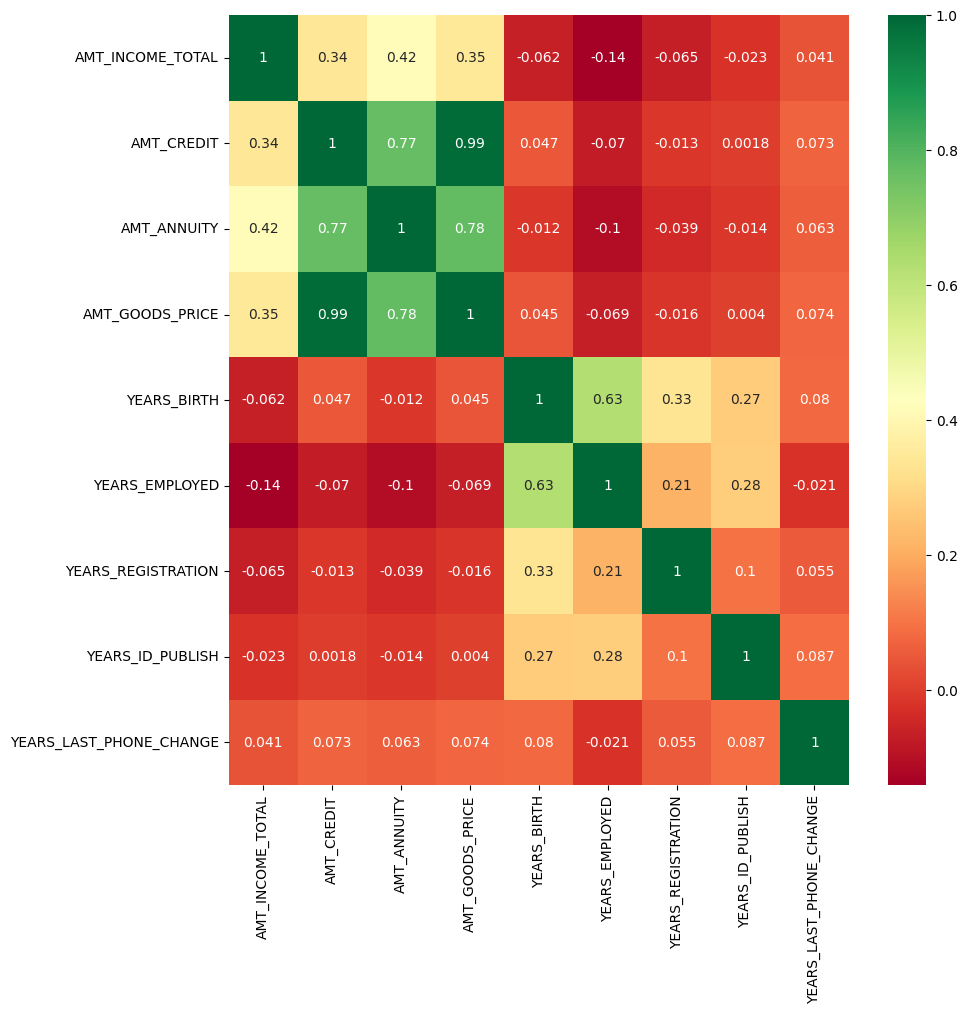

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True, cmap="RdYlGn")
plt.show()

- Conclusion:
 1. AMT_INCOME_TOTAL: It has a +ve correlation index of 0.34,0.42,0.35 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively and negative with most
     of the other near cols.
  2. AMT_CREDIT: It has a strong +ve correlation index of 0.99,0.77 with AMT_GOODS_PRICE, AMT_ANNUITY.
  3. AMT_ANNUITY: It has +ve correlation index of 0.77,0.76 with AMT_CREDIT,AMT_GOODS_PRICE and -ve correlation with most of the other year cols.
  4. AMT_GOODS_PRICE:It has a strong +ve correlation index 0.78,0.99 with AMT_ANNUIT,AMT_CREDIT

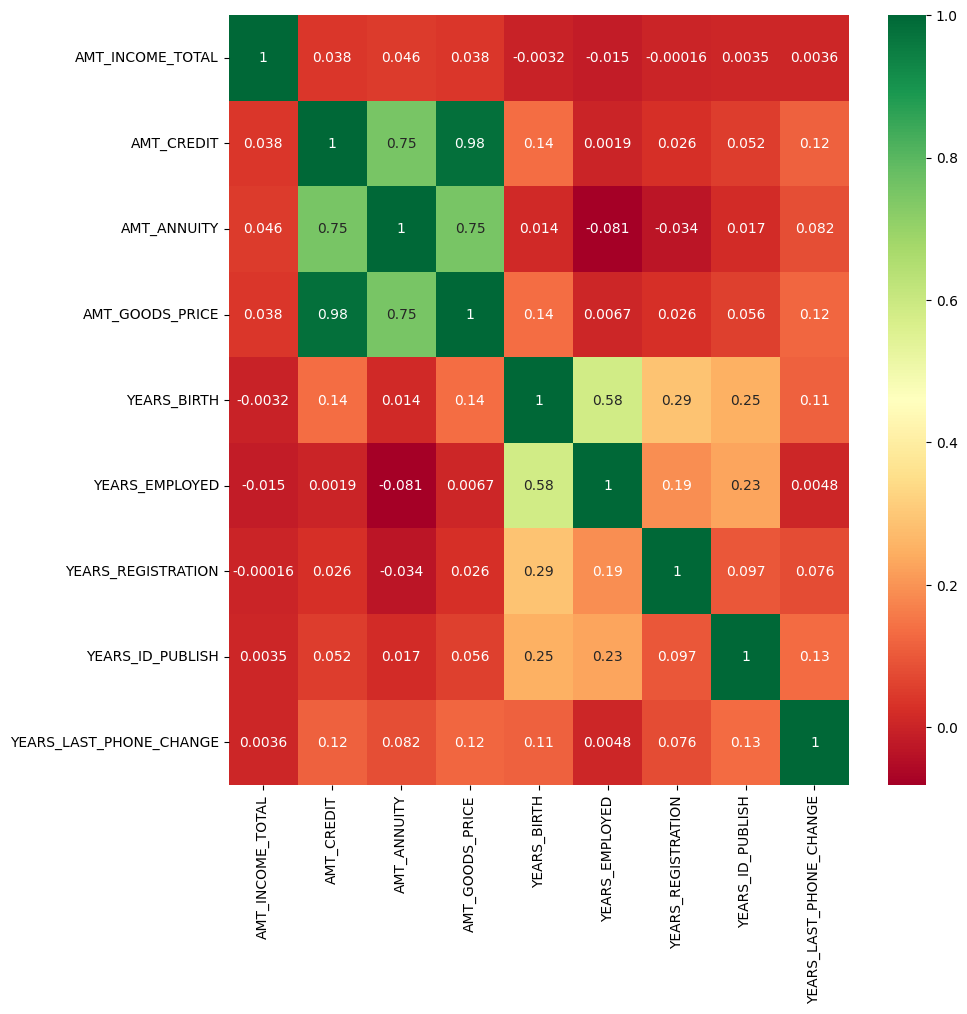

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True, cmap="RdYlGn")
plt.show()

- Conclusion:
 1. AMT_INCOME_TOTAL: It is less correlated with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively
  2. AMT_CREDIT: It has a strong +ve correlation index of 0.98,0.75 with AMT_GOODS_PRICE, AMT_ANNUITY and also with other year cols.
  3. AMT_ANNUITY: It has +ve correlation index of 0.75  with AMT_CREDIT,AMT_GOODS_PRICE and -ve correlation with YEAR_EMPLOYED,YEAR_REGISTRATION
  4. AMT_GOODS_PRICE:It has a strong +ve correlation index 0.75,0.98 with AMT_ANNUIT,AMT_CREDIT and weak +ve correlated with other year cols

## Read previous_application.csv

In [88]:
papp_data=pd.read_csv("previous_application.csv")
papp_data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

In [89]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [90]:
papp_data.shape

(1670214, 37)

### Data quality check
#### check for percentage null values in previous application dataset

In [91]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [92]:
#values greater than 49% null values may give wrong insights
percentage = 49
threshold_p =int(((100-percentage)/100)*papp_data.shape[0] * 1)
papp_df = papp_data.dropna(axis = 1, thresh = threshold_p)
papp_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0    136444.5         112500.0   
3               450000.0    470790.0         450000.0   
4               337500.0    404055.0         337500.0   
...                  ...         ...              ...   
1670209         267295.5    311400.0         267295.5   
1670210          87750.0     64291.5          87750.0   
1670211         105237.0    102523.5         105237.0   
1670212         180000.0    191880.0         180000.0   
1670213         360000.0    360000.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                          XAP             Approved            -73   
1                          XNA             Approved           -164   
2                          XNA             Approved           -301   
3                          XNA             Approved           -512   
4                      Repairs              Refused           -781   
...                        ...                  ...            ...   
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0        Cash through the bank                XAP         Repeater   
1                       

In [93]:
print(papp_df['AMT_GOODS_PRICE'].max())
print(papp_df['AMT_GOODS_PRICE'].min())

6905160.0
0.0


In [94]:
papp_df.shape

(1670214, 32)

In [95]:
papp_df.isnull().mean() * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### Impute missing values

#### check thedtype of missing values in the previous application dataset before imputing

In [96]:
papp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [97]:
# converting negative values into positive
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x:abs(x))

#### validate if any null values present in dataset

In [98]:
null_cols = list(papp_df.columns[papp_df.isnull().any()])
len(null_cols)

11

In [99]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

#### Binning of continuous variables
##### Binning AMT_CREDIT column

In [100]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [101]:
papp_df['AMT_CREDIT_Category'] = pd.cut(papp_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                      labels = ['Very low credit','Low credit','Medium credit','High credit','Very high credit'])

In [102]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize=True)*100

AMT_CREDIT_Category
Very low credit     70.479908
Low credit          15.356801
Medium credit        7.887385
High credit          3.822743
Very high credit     2.453164
Name: proportion, dtype: float64

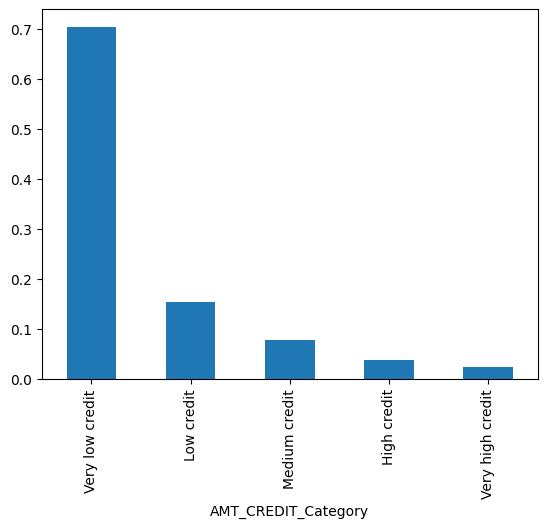

In [103]:
papp_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.bar()
plt.show()

- Conclusion: The credit amount of loan for most applicants is either low(2L to 4L)

##### Binning AMT_GOODS_PRICE col

In [104]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.qcut(papp_df.AMT_GOODS_PRICE,q=[0,0.25,0.45,0.64,0.85,1],
                                              labels=["very low price","low price","medium price","high price","very high price"],
                                             )
                                                

In [105]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize=True)*100

AMT_GOODS_PRICE_Category
very low price     25.000564
high price         23.170330
low price          20.001105
medium price       18.998380
very high price    12.829620
Name: proportion, dtype: float64

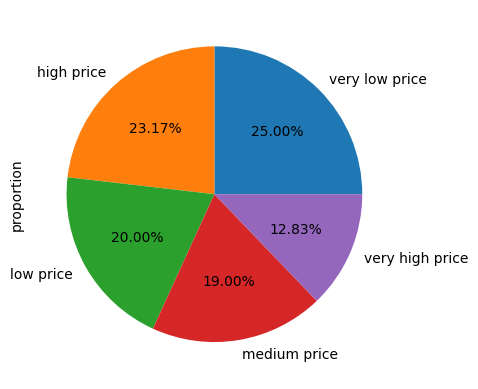

In [106]:
papp_df['AMT_GOODS_PRICE_Category'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

#### Data Imbalance check
##### Dividing previous application dataset with NAME_CONTRACT_STATUS

In [139]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == "Approved"]
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == "Canceled"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [140]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

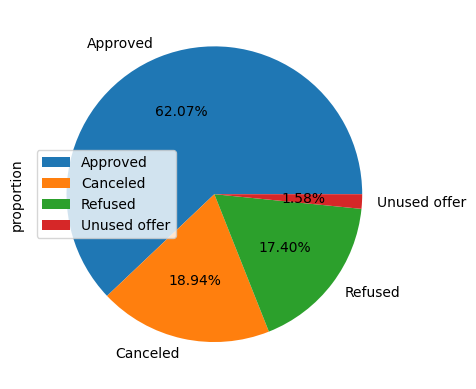

In [141]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.legend()
plt.show()

- Conclusion: 62% of the applicants have the loan approved,19% and 17% are rejected or cancelled and 2% are unused

#### UNIVARIATE ANALYSIS

In [142]:
categorical_cols = list(papp_df.columns[papp_df.dtypes==object])
numerical_cols = list(papp_df.columns[papp_df.dtypes==np.int64]) + list(papp_df.columns[papp_df.dtypes==np.float64])

In [143]:
categorical_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [144]:
numerical_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [145]:
categorical_cols = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','CHANNEL_TYPE',
                     'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

In [146]:
numerical_cols = ['HOUR_APPR_PROCESS_START','DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']

#### Plot on categorical columns

NAME_CONTRACT_TYPE
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: proportion, dtype: float64


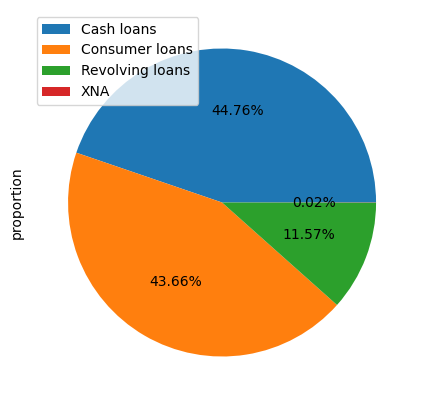

WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: proportion, dtype: float64


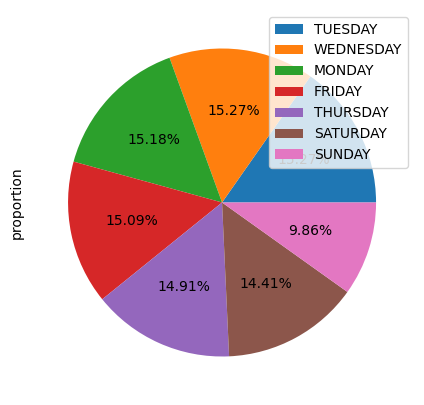

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64


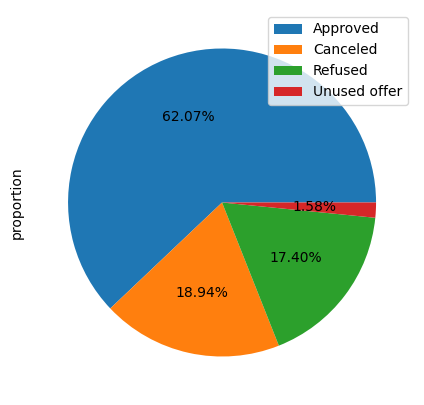

NAME_PAYMENT_TYPE
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: proportion, dtype: float64


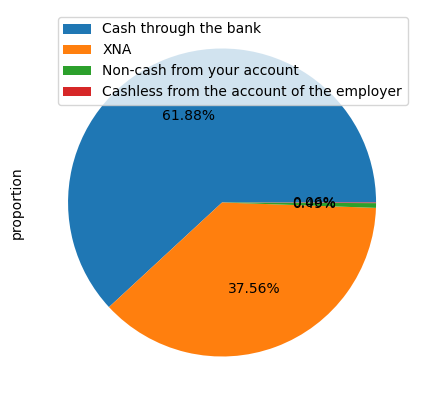

NAME_CLIENT_TYPE
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: proportion, dtype: float64


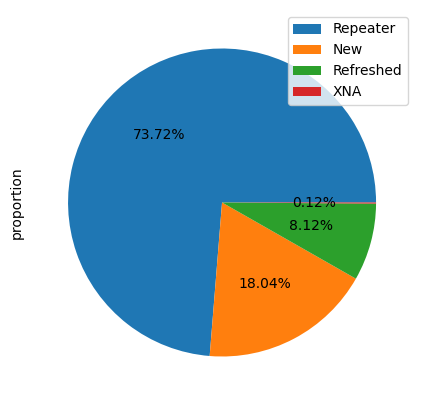

CHANNEL_TYPE
Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: proportion, dtype: float64


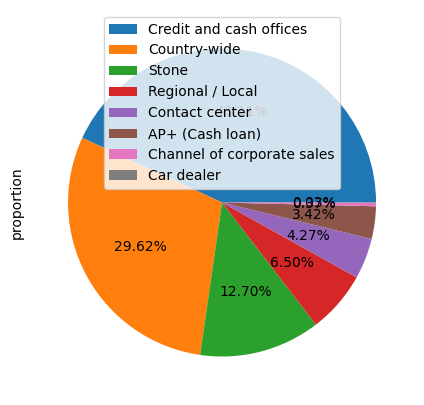

NAME_SELLER_INDUSTRY
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: proportion, dtype: float64


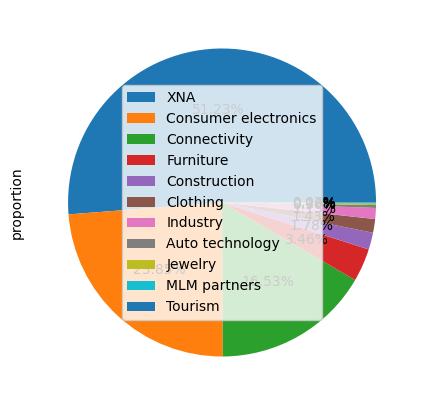

NAME_YIELD_GROUP
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: proportion, dtype: float64


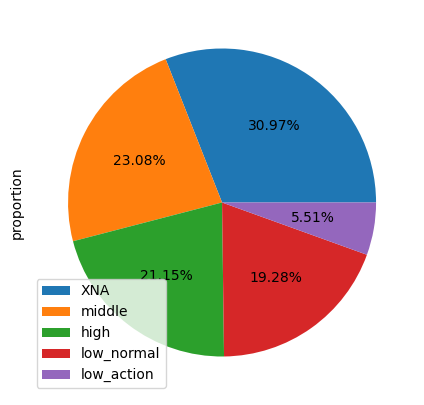

PRODUCT_COMBINATION
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: proportion, dtype: float64


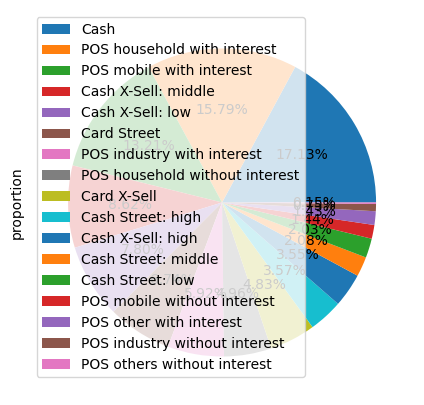

In [147]:
for col in categorical_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=(5,5))
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance= None,autopct="%1.2f%%")
    plt.legend()
    plt.show()

- Conclusion >> Insights on below cols
  1. NAME_CONTRACT_TYPE : 45% applicants received cash loans, 43% received consumer loans, 12% received revolving loans during previous application
  2. WEEKDAY_APPR_PROCESS_START:All the days have almost equal no.of applications
  3. NAME_CONTRACT_STATUS : 62% of the applicantions are approved, 19% cancelled, 17% refused and 2% unused
  4. NAME_PAYMENT_TYPE: 62% of payment types are cash through bank and 38% other sources.
  5. NAME_CLIENT_TYPE: 74% of the applicants are repeaters, 18% are new applicants and 8% are refreshed.
  6. CHANNEL_TYPE :43% channel type is credit and cash offices, 29% are country wide
  7. NAME_SELLER_INDUSTRY: 51% are from other industries, 24% from consumer electronics, 17% from connectivity
  8. NAME_YIELD_GROUP: majority are others
  9. PRODUCT_COMBINATION: most used product combination is cash, then POS household with interest and POS mobile with interest

#### plot on numerical cols:

99th percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


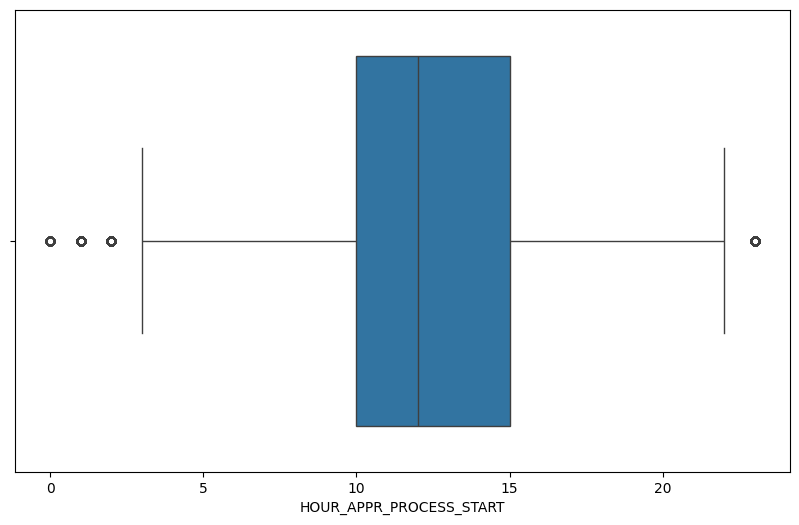

---------------------
99th percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


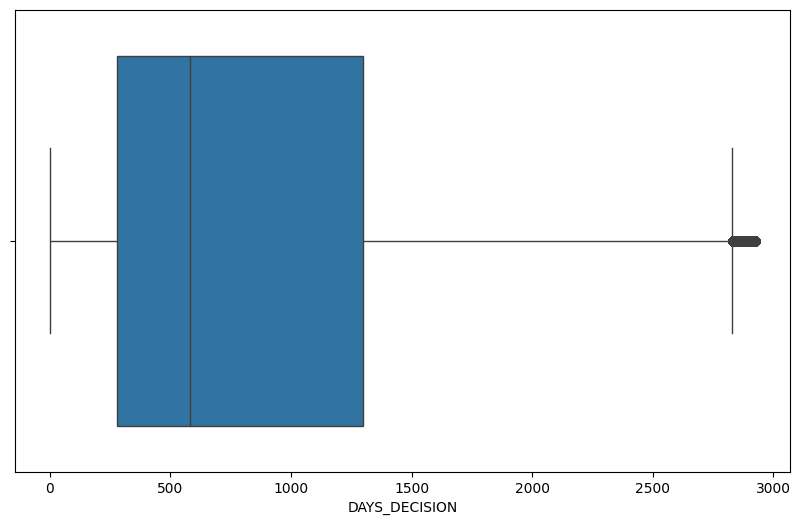

---------------------
99th percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


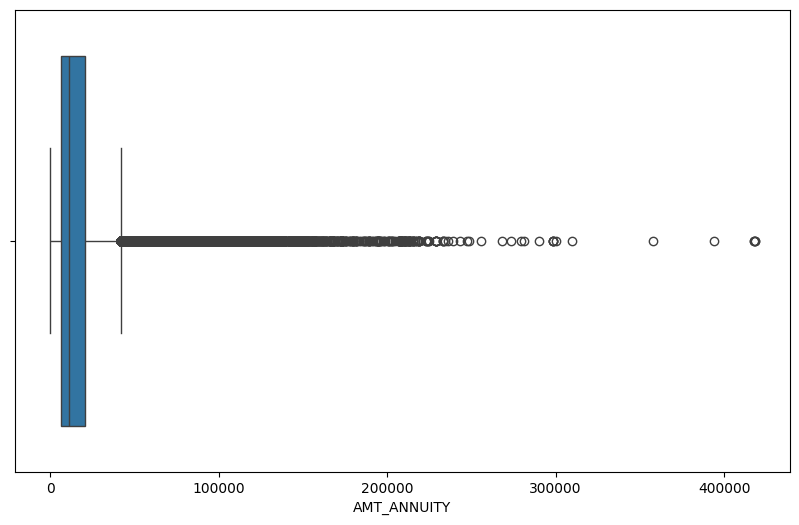

---------------------
99th percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


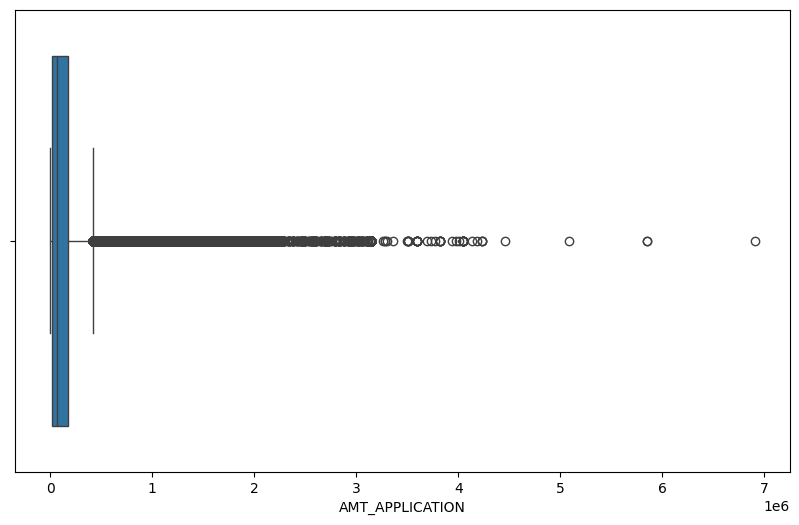

---------------------
99th percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


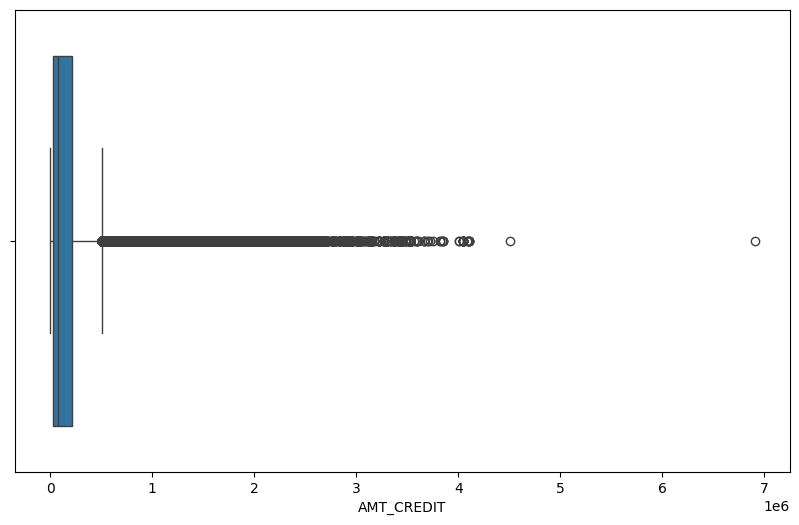

---------------------
99th percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


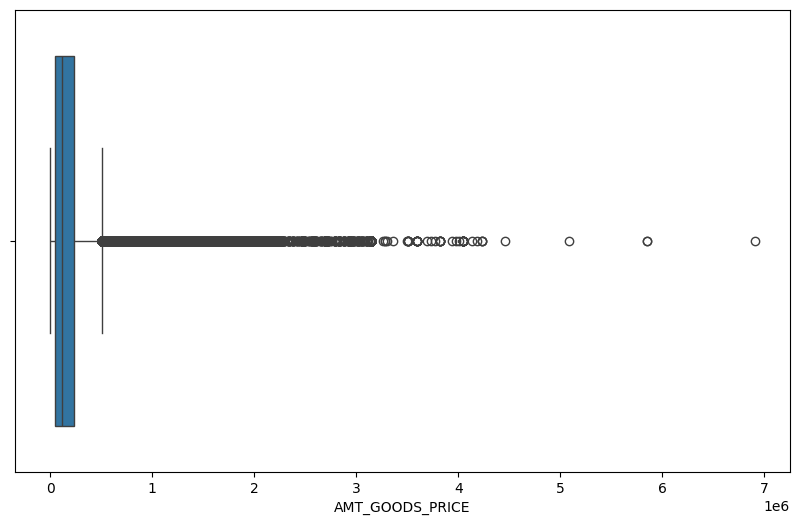

---------------------
99th percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


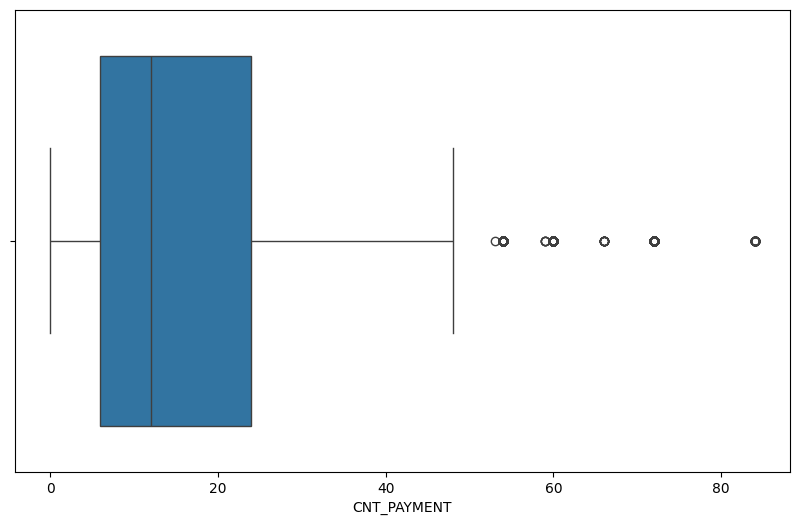

---------------------


In [148]:
for col in numerical_cols:
    print("99th percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=(10,6))
    sns.boxplot(data=papp_df,x=col)
    plt.show()
    print("---------------------")

#### Bivariate and multivariate analysis
#####  Bivariate Analysis b/w WEEKDAY_APPR_PROCESS_START vs  AMT_APPLICATION

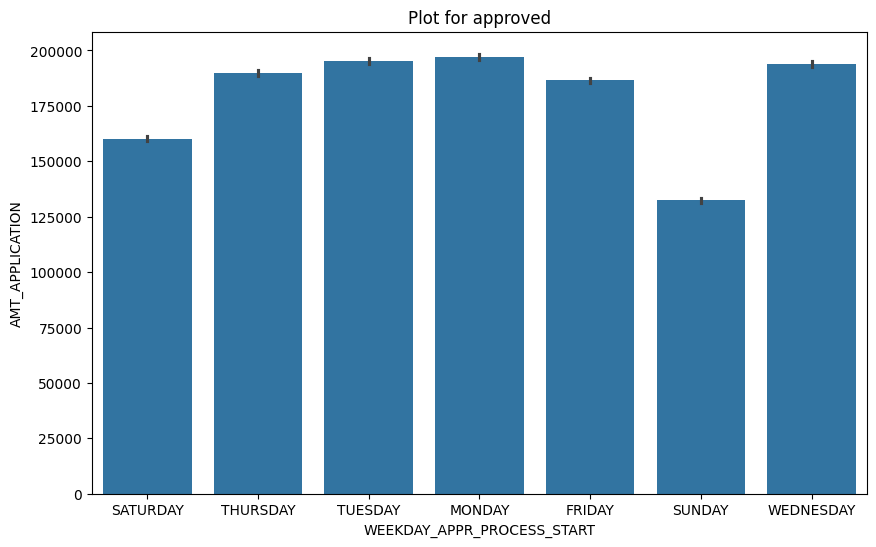

In [149]:
plt.figure(figsize=(10,6))
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION",data=approved)
plt.title("Plot for approved")
plt.show()

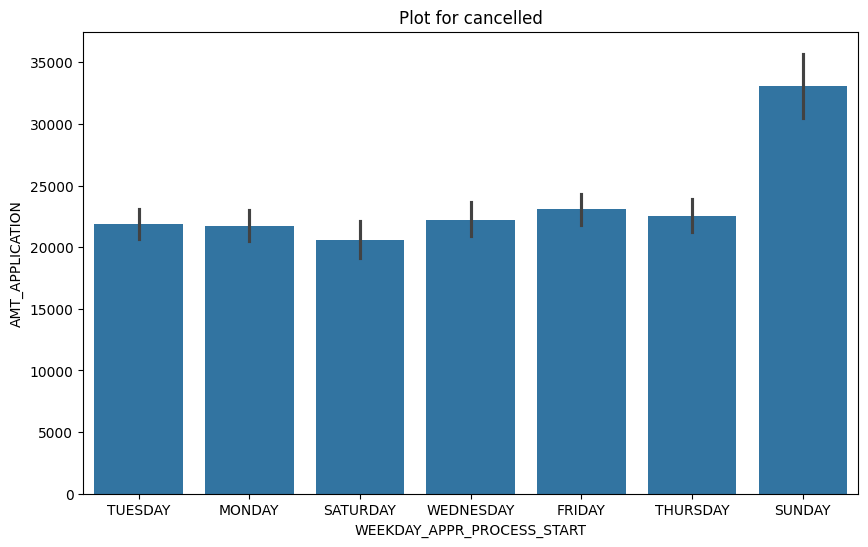

In [150]:
plt.figure(figsize=(10,6))
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION",data=cancelled)
plt.title("Plot for cancelled")
plt.show()

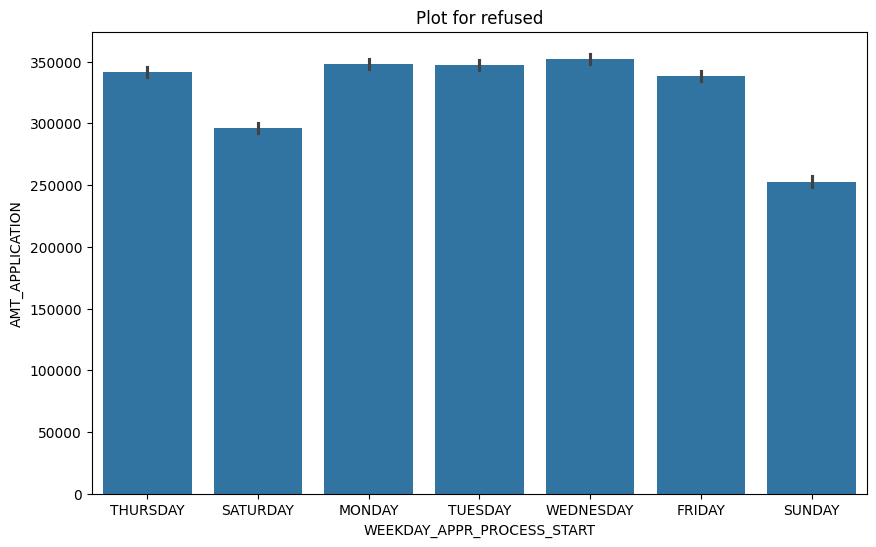

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION",data=refused)
plt.title("Plot for refused")
plt.show()

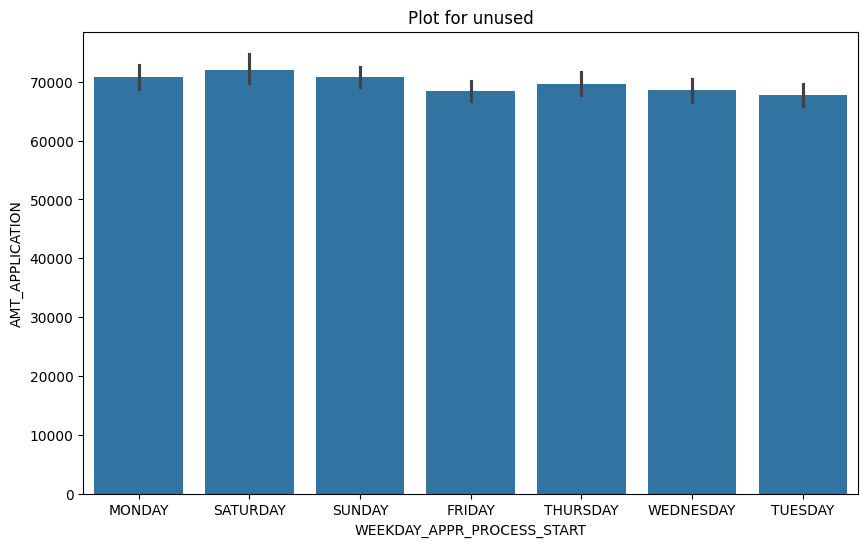

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION",data=unused)
plt.title("Plot for unused")
plt.show()

#### Bivariate anlaysis b/w AMT_ANNUITY vs AMT_GOODS_PRICE

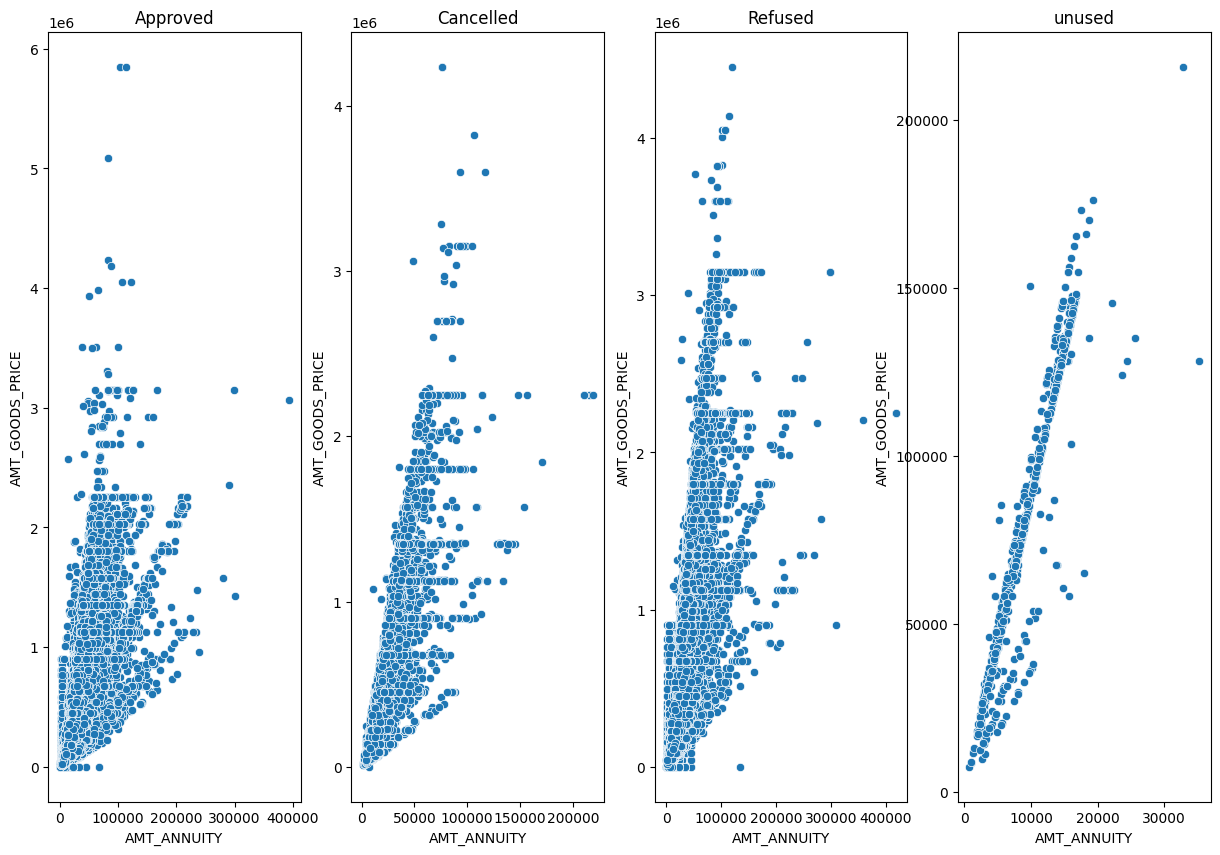

In [153]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE",data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE",data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE",data=refused)
plt.subplot(1,4,4)
plt.title("unused")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE",data=unused)
plt.show()

#### Correlation b/w numerical cols

In [154]:
corr_approved=approved[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_refused=refused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_cancelled=cancelled[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_unused=unused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]


#### correlation for numerical cols for approved

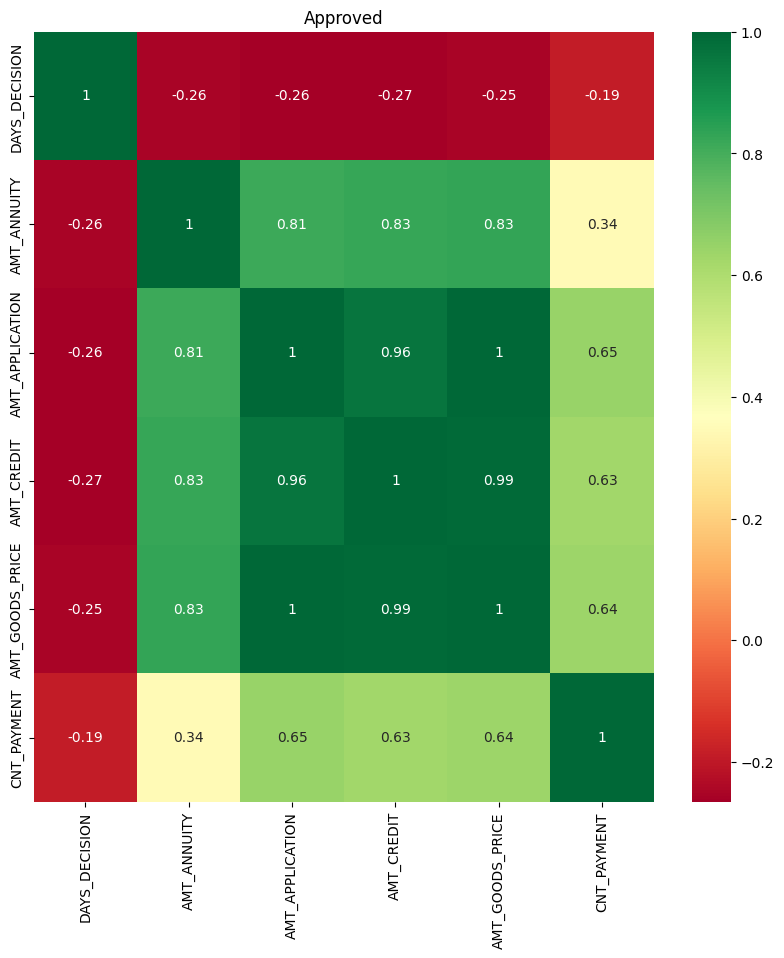

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_approved.corr(),annot=True, cmap="RdYlGn")
plt.title("Approved")
plt.show()

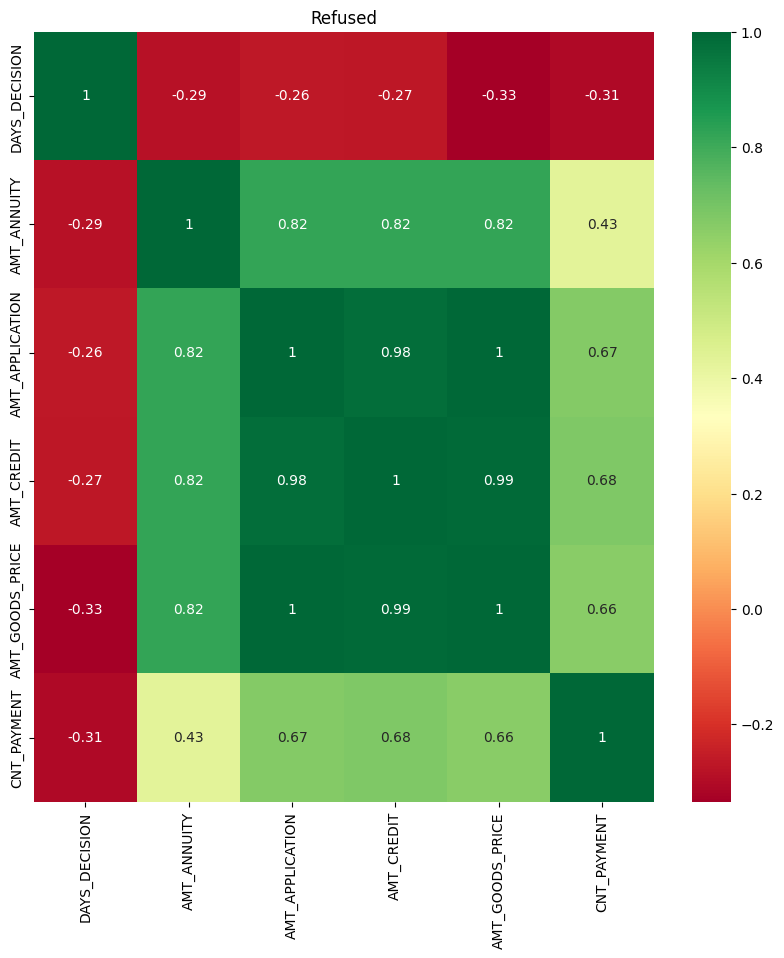

In [156]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_refused.corr(),annot=True, cmap="RdYlGn")
plt.title("Refused")
plt.show()

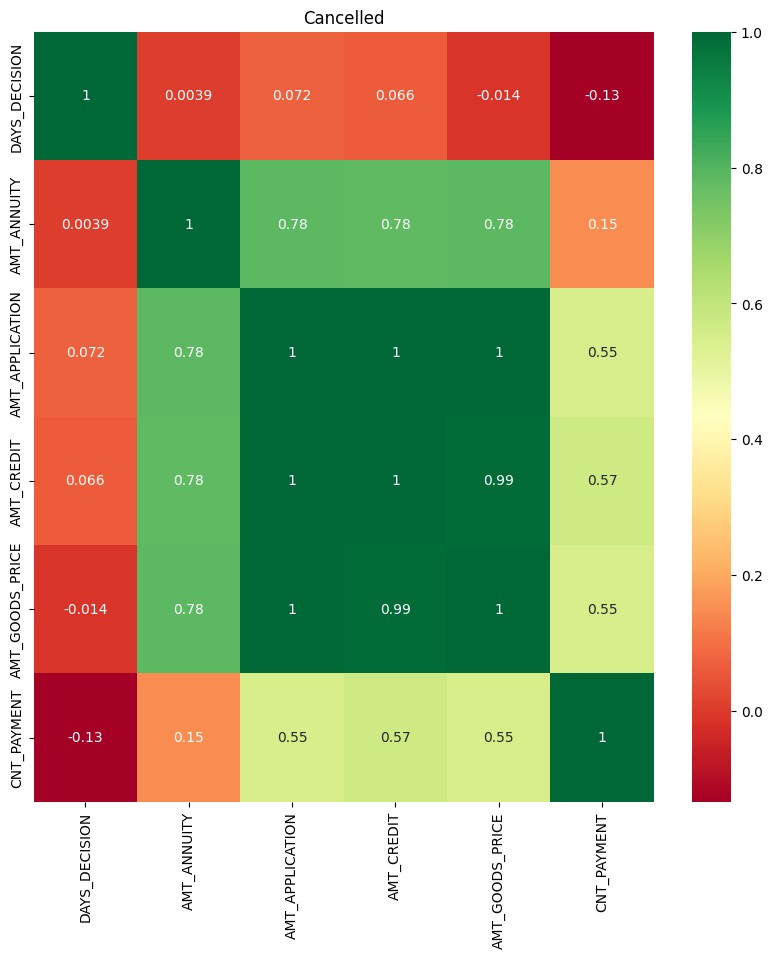

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_cancelled.corr(),annot=True, cmap="RdYlGn")
plt.title("Cancelled")
plt.show()

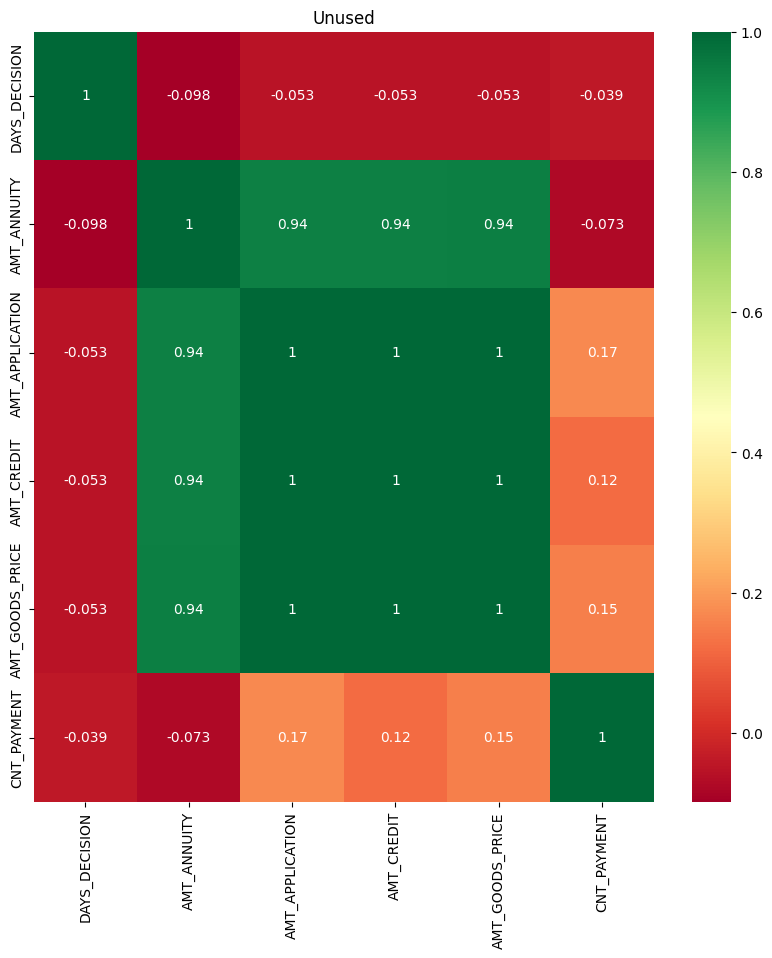

In [158]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_unused.corr(),annot=True, cmap="RdYlGn")
plt.title("Unused")
plt.show()

#### Merge the application and previous application dataframes

In [170]:
merge_df = app_df.merge(papp_df,on=["SK_ID_CURR"],how="left")
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2             -291           1               1                0   
3             -291           1               1                0   
4            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [160]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


#### Filtering required cols for anlaysis

In [161]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col,axis=1,inplace=True)
        

In [162]:
merge_df.shape

(1430155, 84)

In [163]:
res1= pd.pivot_table(data=merge_df,index=['NAME_INCOME_TYPE','NAME_CLIENT_TYPE'],columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

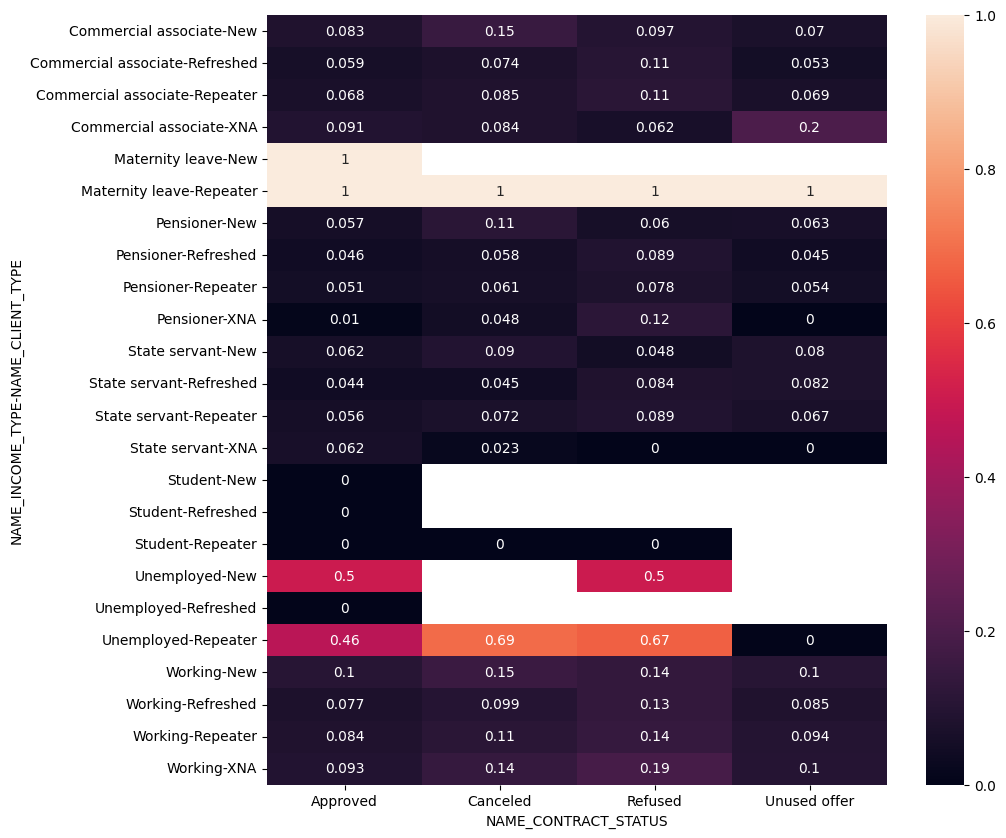

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(res1,annot=True)
plt.show()

In [174]:
res2= pd.pivot_table(data=merge_df,index=['CODE_GENDER','NAME_SELLER_INDUSTRY'],columns=["TARGET"],values=["AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y"],aggfunc="sum")
res2

AMT_GOODS_PRICE_x                \
TARGET                                           0             1   
CODE_GENDER NAME_SELLER_INDUSTRY                                   
F           Auto technology           6.111273e+08  5.364450e+07   
            Clothing                  9.403640e+09  4.968903e+08   
            Connectivity              7.070942e+10  5.910960e+09   
            Construction              8.794223e+09  5.130180e+08   
            Consumer electronics      1.086232e+11  7.170236e+09   
            Furniture                 1.987179e+10  1.034667e+09   
            Industry                  5.634099e+09  3.440790e+08   
            Jewelry                   6.349129e+08  4.627532e+07   
            MLM partners              3.501245e+08  2.293200e+07   
            Tourism                   1.711690e+08  5.674500e+06   
            XNA                       2.409409e+11  2.068024e+10   
M           Auto technology           1.142561e+09  1.286955e+08   
            Clothing                  1.418759e+09  1.160505e+08   
            Connectivity              4.010272e+10  4.572106e+09   
            Construction              3.882024e+09  3.197192e+08   
            Consumer electronics      6.305746e+10  5.757388e+09   
            Furniture                 5.886620e+09  4.915566e+08   
            Industry                  2.905955e+09  2.527595e+08   
            Jewelry                   2.021443e+08  2.709533e+07   
            MLM partners              6.380550e+07  6.390000e+06   
            Tourism                   4.858650e+07  3.640500e+06   
            XNA                       1.014658e+11  1.203918e+10   
XNA         Connectivity              2.700000e+06           NaN   
            Consumer electronics      3.262500e+06           NaN   
            Furniture                 1.350000e+06           NaN   
            XNA                       2.092500e+07           NaN   

                                 AMT_GOODS_PRICE_y                
TARGET                                           0             1  
CODE_GENDER NAME_SELLER_INDUSTRY                                  
F           Auto technology           1.899267e+08  1.627524e+07  
            Clothing                  3.172276e+09  1.594839e+08  
            Connectivity              8.255723e+09  7.669196e+08  
            Construction              2.575969e+09  1.489447e+08  
            Consumer electronics      2.102500e+10  1.427703e+09  
            Furniture                 5.291644e+09  2.945375e+08  
            Industry                  1.600501e+09  1.004172e+08  
            Jewelry                   1.217451e+08  9.231612e+06  
            MLM partners              1.368778e+08  7.291516e+06  
            Tourism                   8.815424e+07  1.771690e+06  
            XNA                       1.151940e+11  9.820652e+09  
M           Auto technology           3.790645e+08  5.158010e+07  
            Clothing                  4.907122e+08  3.970900e+07  
            Connectivity              4.617039e+09  6.137073e+08  
            Construction              1.122353e+09  1.054039e+08  
            Consumer electronics      1.178103e+10  1.190277e+09  
            Furniture                 1.721125e+09  1.597306e+08  
            Industry                  1.045102e+09  9.028734e+07  
            Jewelry                   3.721060e+07  5.426736e+06  
            MLM partners              3.401424e+07  3.311114e+06  
            Tourism                   2.329683e+07  1.453316e+06  
            XNA                       4.806308e+10  5.785983e+09  
XNA         Connectivity              5.133240e+05           NaN  
            Consumer electronics      4.602007e+05           NaN  
            Furniture                 4.721850e+05           NaN  
            XNA                       1.010250e+07           NaN

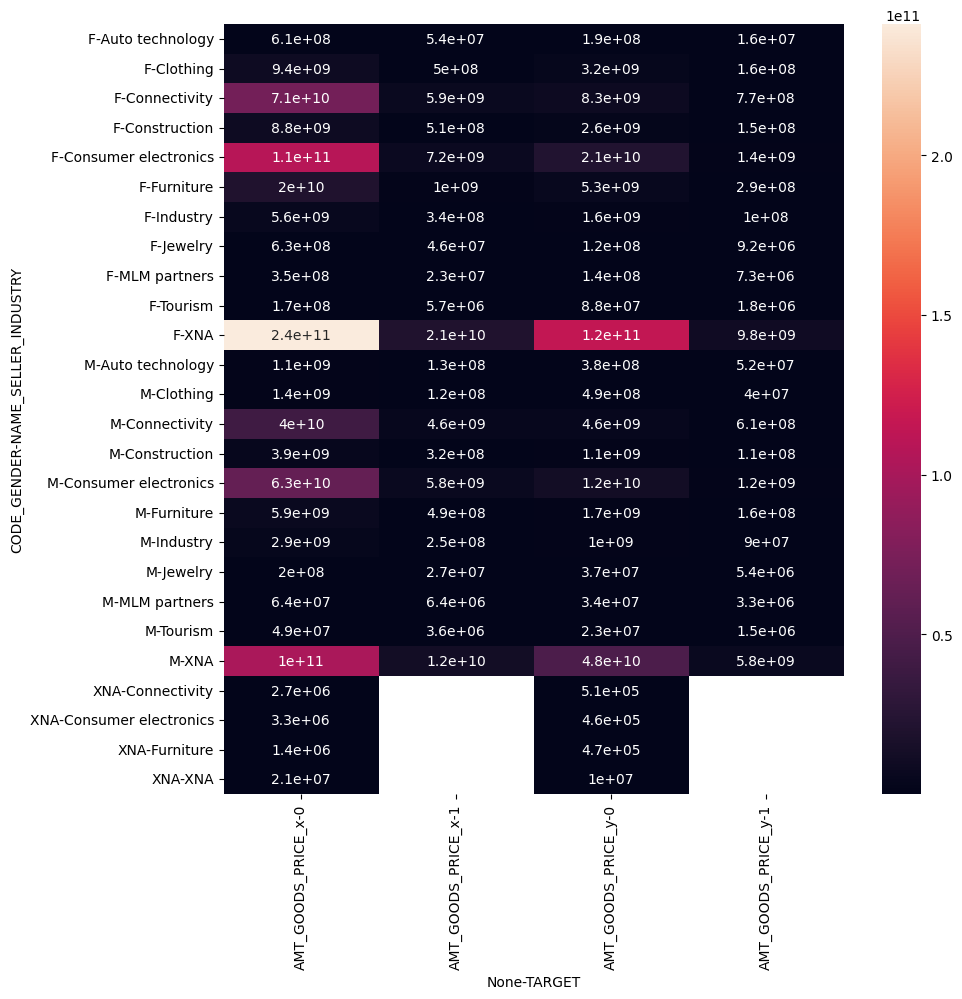

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(res2,annot=True)
plt.show()